<div style="border:solid green 3px; padding: 20px">
																					
<b>Привет!</b>
																					
Меня зовут Сороколетов Илья и я буду проверять твой проект. 
																					
Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)
																					
																					
Для твоего удобства, я буду выделять свои комментарии следующим образом:
																					
<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>
																					
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.
																					
</div>
																					
<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>
																					
																					
Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.
																					
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>
																					
<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 
																					
Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху
																					
Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)
																					
P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
																					    
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b>
<br>Если ты работаешь локально, то следует указывать два пути к файлу через конструкцию try...except...
<br>Поправь, пожалуйста, чтобы я смог проверить твой проект. На всякий случай приложу путь к файлу на платформе
    
    /datasets/real_estate_data.csv

<br>P.S. Я не засчитываю это как полноценную проверку, поэтому у тебя все ещё остаётся 6 попыток 🙂
</div>


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

### Первые 10 строк

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


 <div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой
			
	pd.set_option('display.max_columns', None)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Извиняюсь, не очень понял как применить эту команду.

Так не работает
    
    data.head(10).pd.set_option('display.max_columns', None)

И так не работает

    
    pd.set_option('display.max_columns', None)
</div>

 <div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v2:</b> 
<br>Нужно сделать так)
			
	pd.set_option('display.max_columns', None) 
    data.head(10)
</div>

### Информация о таблице и данных в ней

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Всего 23699 строк с жильем
Пропущенные значения в колонках с:
- Высотой потолков, 
- Количеством этажей в доме, 
- Жилой площадью, 
- Обозначением апартаментов(возможно большая часть не заполняла эту графу потому что у них не апартаменты), 
- Площадью кухни, 
- Количеством балконов(возможно большая часть не заполняла эту графу потому что у них нет балконов), 
- Названием населенного пункта(возможно графа не заполнена потому что квартира в городе), 
- Расстоянием до аэропорта, 
- Расстоянием до центра города(возможно жилье не в городе и данные не заполняются автоматически), 
- Количеством парков на расстоянии 3 км(возможно рядом нет парков и данные не заполняются автоматически), 
- Расстоянием до ближайшего парка, 
- Количеством водемов в радиусе 3 км(возможно рядом нет водоемов и данные не заполняются автоматически), 
- Расстоянием до ближайшего водоема, 
- Количеством дней размещения.


В таблице виден не правильный формат данных. В колонках с:
- Датой размещения( должен быть datetime64), 
- Количеством этажей в доме( должен быть int64), 
- Обозначением апартаментов(должен быть bool), 
- Колличеством балконов( должен быть int64), 
- Количеством парков в радиусе 3 км( должен быть int64), 
- Количеством водоемов в радиусе 3 км( должен быть int64), 
- Количеством дней размещения( должен быть int64).

### Гистограммы и выводы по ним

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

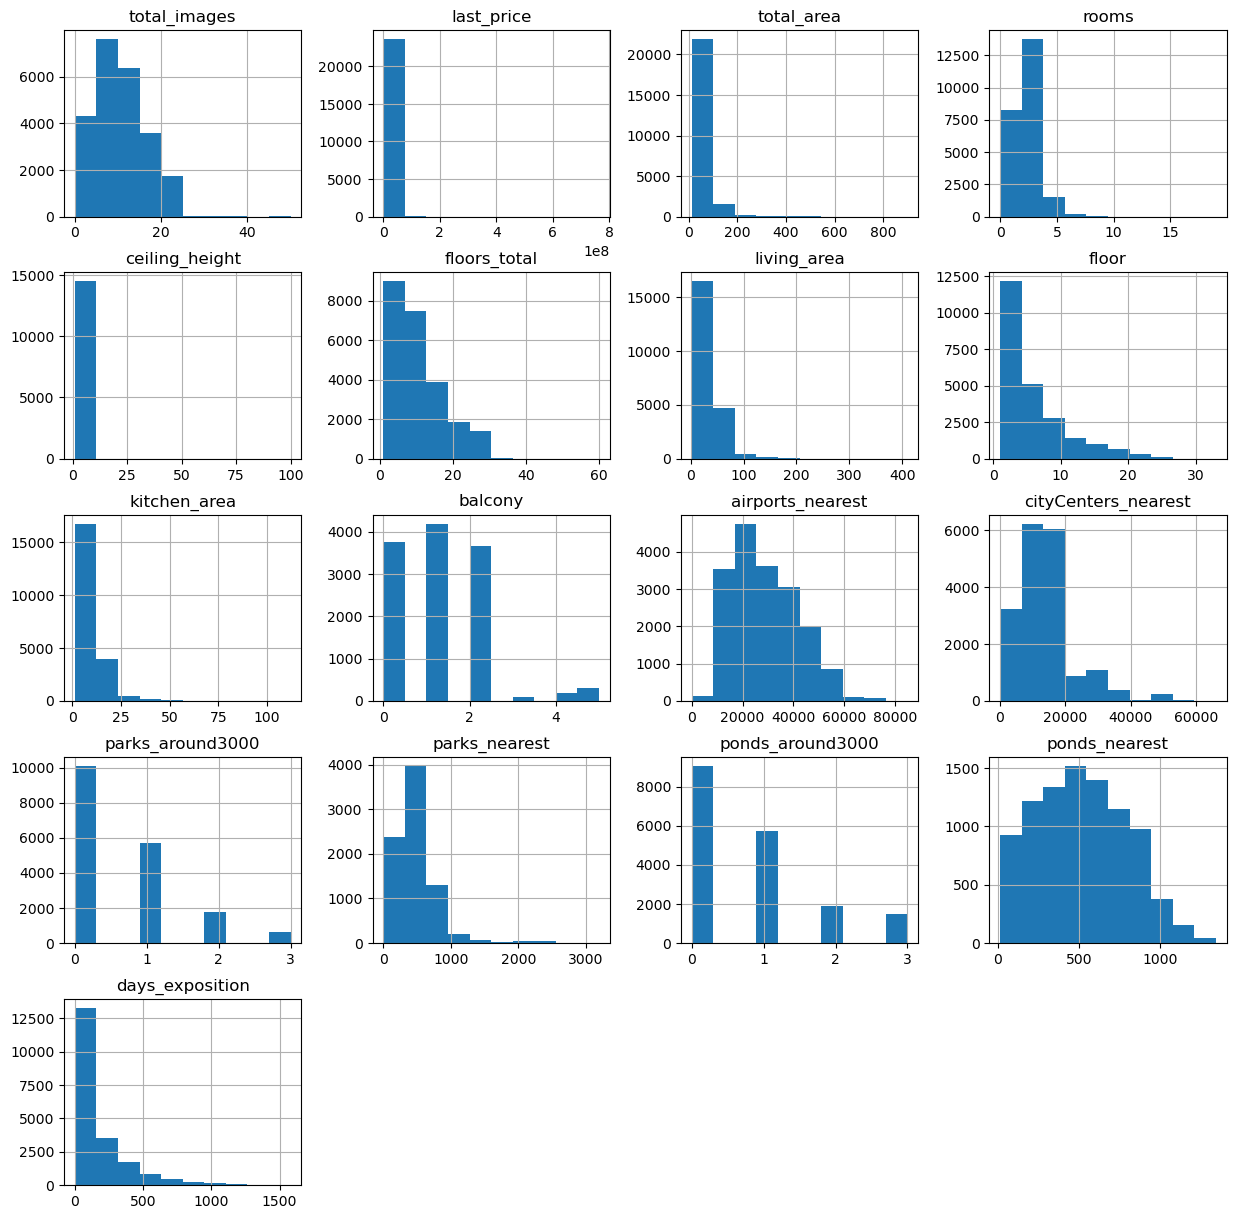

In [6]:
data.hist(figsize=(15,15))

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>
															
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)

	data.hist(figsize=(15, 20));
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Взял на заметку, спасибо!)
</div>

На гистограммах видно:
- Больше всего жилья с 10 изображениями (8000)
- Цена на момент снятия - не показательна, надо менять масштаб 
- Больше всего жилья с общей площадью меньше 100 кв.м.(22000)
- Больше всего жилья с 2-3 комнатами(но надо проверить нулевые значения) (13500)
- Высота потолков - не показательна, надо менять масштаб, так же там много пропущенных значений
- Больше всего жилья где до 5 этажей в доме(возможно в колонке много нулевых значений)(9000)
- Больше всего жилья с жилой площадью до 50 кв.м.(но надо проверить нулевые значения)
- Больше всего жилья распологается на высоте до 5 этажа (но надо проверить нулевые значения, хотя если посмотреть на гистограмму с количеством этажей в доме, то там популярны пятиэтажки, что сходится со значением в этой колонке)
- Больше всего жилья с площадью кухни до 12 кв.м. (но надо проверить нулевые значения)
- Количество балконов не показательно так как количество значений 12 тыс из 24 тыс всего (50%)
- Больше всего жилья находится на расстоянии 20 км от аэропорта (5000)
- Больше всего жилья находится на расстоянии до 10 км от центра города (6500)
- Больше всего жилья находится без парков на расстоянии 3 км (10000)
- Больше всего жилья находится на расстоянии 500 м от парка (4000)
- Больше всего жилья находится без водоемов на расстоянии 3 км (9000)
- Больше всего жилья находится на расстоянии 500 м от водоема (1500)
- Количество дней размещения надо смотреть отдельно, так как большая часть в районе нуля, но масштаб слишком большой, что бы увидеть количество дней до 100

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Если тебе так будет удобнее, то можно создать универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики поочередно применяя методы head, describe, info, duplicated и т.п.
</div>

## Выполните предобработку данных

### Пропущенные значения

Попробую заполнить пропущенные значения в колонках с:
- Высотой потолков, 
- Количеством этажей в доме, 
- Жилой площадью, 
- Обозначением апартаментов(возможно большая часть не заполняла эту графу потому что у них не апартаменты), 
- Площадью кухни, 
- Количеством балконов(возможно большая часть не заполняла эту графу потому что у них нет балконов), 
- Названием населенного пункта(возможно графа не заполнена потому что квартира в городе), 
- Расстоянием до аэропорта, 
- Расстоянием до центра города(возможно жилье не в городе и данные не заполняются автоматически), 
- Количеством парков на расстоянии 3 км(возможно рядом нет парков и данные не заполняются автоматически), 
- Расстоянием до ближайшего парка, 
- Количеством водемов в радиусе 3 км(возможно рядом нет водоемов и данные не заполняются автоматически), 
- Расстоянием до ближайшего водоема, 
- Количеством дней размещения.

#### Высота потолков:

In [7]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Среднее значение 2.77, медиана 2.65, кажутся нормальными, но минимальное значение 1 метр и максимальное в 100 метров требуют проверки.

In [8]:
data[data['ceiling_height'] >= 20]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,False,False,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,False,False,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,False,False,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,False,False,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,False,False,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,NaN,False,False,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,NaN,False,False,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


Это значения больше 9 метров. Обычная 5-этажка по данным интернета по высоте 14-15 метров, а 9-этажка - не более 30. Значит все эти значения выглядят не правдоподобно, вероятно в значениях больше 20 метров, люди не правильно поставили запятую(точку) и скорее всего это значения 2 и 3 метра соответственно. 100 метровые потолки как пропущенные значения поменяем сначала на пропуски.

In [9]:
for e in data['ceiling_height']:
    if e >= 100:
        data.loc[data['ceiling_height'] == e, 'ceiling_height'] = pd.NA
    elif e >= 20:
        data.loc[data['ceiling_height'] == e, 'ceiling_height'] = e / 10
    else:
        data.loc[data['ceiling_height'] == e, 'ceiling_height'] = e

Изучу природу пропусков в колонке с высотой потолков

In [10]:
data[data['ceiling_height'].isna()].head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
11,9,3300000.0,44.00,2018-08-27T00:00:00,2,NaN,5.0,31.00,4,False,False,False,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
14,1,4400000.0,36.00,2016-06-23T00:00:00,1,NaN,6.0,17.00,1,NaN,False,False,8.00,0.0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14503 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В колонке высоты потолков 14503 строки из 23699, что является 2/3 и это мало. Заполню эти значения медианой, сейчас она должна быть более корректна, так как мы убрали аномальные значения.

In [12]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен с таким решением для столбца с высотой потолков, так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

#### Удаленность объектов

В таблице видно, что пропуски есть почти целыми строками в колонках с отдаленностью от объектов которые считаются автоматически( значит человек не указал адрес или геопозицию) с точки зрения анализа эти объекты не представляют ценности, поэтому удалю их.

In [13]:
data = data.dropna(thresh=15)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20552 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          20552 non-null  int64  
 1   last_price            20552 non-null  float64
 2   total_area            20552 non-null  float64
 3   first_day_exposition  20552 non-null  object 
 4   rooms                 20552 non-null  int64  
 5   ceiling_height        20552 non-null  float64
 6   floors_total          20477 non-null  float64
 7   living_area           19266 non-null  float64
 8   floor                 20552 non-null  int64  
 9   is_apartment          2697 non-null   object 
 10  studio                20552 non-null  bool   
 11  open_plan             20552 non-null  bool   
 12  kitchen_area          18963 non-null  float64
 13  balcony               11680 non-null  float64
 14  locality_name         20510 non-null  object 
 15  airports_nearest      18

#### Удаленность от аэропорта и центра города

Посмотрим на пропущенные значения по удаленности от аэропорта.

In [14]:
data[data['airports_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.00,5,NaN,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
47,17,3600000.0,56.10,2018-10-18T00:00:00,3,2.65,4.0,42.50,3,NaN,False,False,5.70,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
62,0,4800000.0,78.60,2017-09-17T00:00:00,3,2.80,9.0,48.80,5,NaN,False,False,11.90,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
66,6,3450000.0,34.00,2015-12-16T00:00:00,1,2.60,17.0,17.40,8,False,False,False,11.50,2.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23630,11,3790000.0,37.00,2017-02-20T00:00:00,1,2.75,18.0,18.80,7,False,False,False,10.30,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,69.0
23638,8,4920000.0,76.26,2014-12-25T00:00:00,3,2.65,15.0,42.55,13,NaN,False,False,10.18,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,939.0
23643,1,660000.0,45.00,2019-02-19T00:00:00,2,2.65,5.0,31.00,4,False,False,False,6.00,1.0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23666,9,8150000.0,80.00,2016-04-17T00:00:00,3,2.65,17.0,44.90,12,NaN,False,False,11.40,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,286.0


Здесь вообще нет данных по геопозиции. Возможно, если объект находится не в Санкт-Петербурге, то в колонках с удаленностью от объектов ставятся пропуски. Посмотрю какие населенные пункты представленны в этом списке.

In [15]:
data[data['airports_nearest'].isna()]['locality_name'].value_counts()

locality_name
посёлок Мурино         243
деревня Кудрово        185
Всеволожск             177
Гатчина                173
Выборг                  92
                      ... 
деревня Заклинье         1
посёлок Гаврилово        1
деревня Торошковичи      1
Ломоносов                1
деревня Рабитицы         1
Name: count, Length: 243, dtype: int64

Теория подтвердилась, здесь все, кроме Санкт-Петербурга. Поменяю пропущенные значения в колонках расстояния до центра города и аэропорта на 100 км. Так будет удобнее смотерть график.

data['airports_nearest'] = data['airports_nearest'].fillna(100000)

data['airports_nearest'] = data['airports_nearest'].astype(int)

data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(100000)

data['cityCenters_nearest'] = data['cityCenters_nearest'].astype(int)

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Пропуски в столбцах с картографическими данными лучше не трогать. Заполняя их таким образом, ты проставляешь одинаковые расстояния до центра (парка, прудов, аэропорта) для разных квартир, хотя они могут быть расположены в разных частях города. Эти пропуски заполнять не нужно
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Поменял ячейки с кодом на Markdown. 
    Оставлю тогда эти значения пропущенными, при этом у меня не получится поменять тип на целочисленный.
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v2:</b> 
<br>Можно изменить тип данных без замены пропусков следующим образом
    
    import numpy as np
    df['col'] = np.floor(pd.to_numeric(df['col'], errors='coerce')).astype('Int64')
</div>

#### Расстояние до ближайшего парка и водоема

При этом пропущенных значений в колонках с расстоянием до ближайшего парка и водоема в два раза больше. Возможно, если парки или водоемы не находились в радиусе 3 км, то и расстояние до ближайшего не вписывалось(или ближайший дальше установленного порога, что бы не считать расстояние до парка или водоема в Москве например)

In [16]:
data.query('parks_around3000 == 0 & parks_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,2.65,26.0,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,NaN,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,2.65,5.0,31.0,4,False,False,False,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.0,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,False,False,15.6,NaN,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.0,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,False,False,5.6,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,2.65,9.0,20.0,6,NaN,False,False,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23688,19,9200000.0,101.0,2019-04-01T00:00:00,3,3.05,15.0,63.0,12,NaN,False,False,15.0,NaN,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23.0


Пропуски в колонках с парками и водоемами рядом и расстоянием до ближайших. 

Скорее всего пропущенные значения в колонках с парками и водоемами в радиусе 3км появились потому что парков и водоемов в этом радиусе нет. Поэтому заполним пропущенные значения нулями.

In [17]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [18]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Замену отсутствующих значений на ноль оставляю.
</div>

Расстояние до ближайшего парка и водоема считатется с програмным ограничением. Это видно по максимальным значениям в этих колонках. Это значит, что пропущенные значения говорят об удаленности объектов больше пограничного значения. Установлю в пропущенные ячейки значение 5000.

In [19]:
data[['ponds_nearest', 'parks_nearest']].describe()

,ponds_nearest,parks_nearest
count,9110.000000,8079.000000
mean,517.980900,490.804555
std,277.720643,342.317995
min,13.000000,1.000000
25%,294.000000,288.000000
50%,502.000000,455.000000
75%,729.000000,612.000000
max,1344.000000,3190.000000


data['parks_nearest'] = data['parks_nearest'].fillna(5000)

data['ponds_nearest'] = data['parks_nearest'].fillna(5000)

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Эти ячейки с кодом тоже поменял на Markdown, что бы код не работал
</div>

#### Количество этажей в доме

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20552 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          20552 non-null  int64  
 1   last_price            20552 non-null  float64
 2   total_area            20552 non-null  float64
 3   first_day_exposition  20552 non-null  object 
 4   rooms                 20552 non-null  int64  
 5   ceiling_height        20552 non-null  float64
 6   floors_total          20477 non-null  float64
 7   living_area           19266 non-null  float64
 8   floor                 20552 non-null  int64  
 9   is_apartment          2697 non-null   object 
 10  studio                20552 non-null  bool   
 11  open_plan             20552 non-null  bool   
 12  kitchen_area          18963 non-null  float64
 13  balcony               11680 non-null  float64
 14  locality_name         20510 non-null  object 
 15  airports_nearest      18

Количество этажей в доме 20477 строк из 20552. Предположить какое может быть количество этажей в доме невозможно на мой взгляд, поэтому оставим как есть, тем более, что данных почти 100%.

#### Жилая площадь

Жилая площадь указана в 19266 строках из 20522.

#### Апартаменты

Значение апартаментов присутствует только в 2697 строках. Проверим сколько из них со значением `True`.

In [21]:
data['is_apartment'].value_counts()

is_apartment
False    2648
True       49
Name: count, dtype: int64

49 из 2697 значений. Это 2 %. К сожалению данных очень мало. Скорее всего это поле не заполняли и оно осталось пропущенным. Заполним ячейки значением `False`

In [22]:
data['is_apartment'] = data['is_apartment'].fillna(False)

/var/folders/x5/shnp329907331sz0s0n6_20m0000gn/T/ipykernel_23063/2052809825.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(False)


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

#### Площадь кухни и жилая площадь

Площадь кухни заполнена в 18963 из 20522. Проверим значения.

In [23]:
data['kitchen_area'].describe()

count    18963.000000
mean        10.757915
std          6.105211
min          1.300000
25%          7.100000
50%          9.400000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Площадь кухни 112 метров не очень стандартная. Надо проверить на сколько это и другие высокие значения аномальны. Посмотрим строки со значениями выше 30 кв.м. и сравню с общей площадью.

<Axes: >

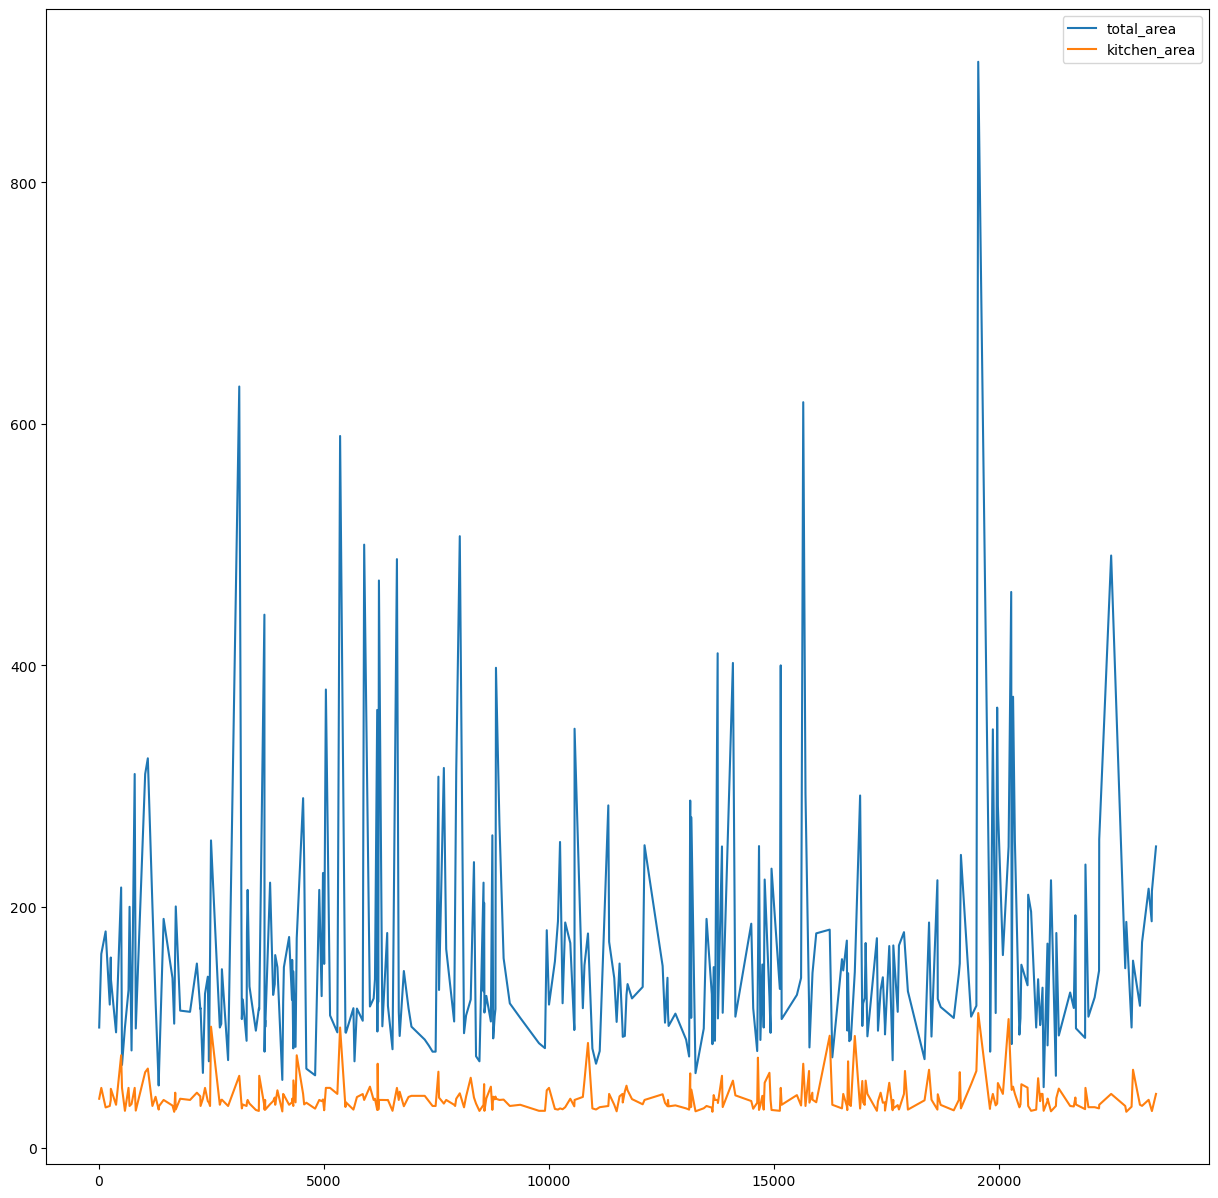

In [24]:
data[data['kitchen_area'] > 30][['total_area', 'kitchen_area']].plot(figsize=(15, 15))

Видно что площадь кухни не выходит за границы общей площади. Это значит, что значения не аномальны. Посмотрим на строки с пропущенными значениями.

In [25]:
data[data['kitchen_area'].isna()].head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,False,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.50,2017-03-06T00:00:00,1,2.65,13.0,NaN,13,False,False,False,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
82,3,4500000.0,80.50,2018-01-15T00:00:00,3,2.65,25.0,NaN,16,False,False,False,NaN,NaN,посёлок Шушары,12430.0,18217.0,0.0,NaN,0.0,NaN,60.0
155,8,96000000.0,317.00,2017-07-07T00:00:00,4,3.50,3.0,183.00,3,False,False,False,NaN,1.0,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0
178,18,16300000.0,153.00,2019-03-30T00:00:00,4,2.71,10.0,89.40,10,False,False,False,NaN,1.0,Санкт-Петербург,52130.0,14042.0,0.0,NaN,2.0,346.0,NaN
188,15,4600000.0,38.50,2019-04-16T00:00:00,1,2.50,12.0,18.50,5,False,False,False,NaN,NaN,Санкт-Петербург,49065.0,16735.0,1.0,501.0,0.0,NaN,NaN
195,8,5300000.0,60.00,2016-05-19T00:00:00,3,2.65,9.0,NaN,4,False,False,False,NaN,0.0,Санкт-Петербург,52072.0,17061.0,1.0,1133.0,3.0,239.0,372.0
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,False,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
248,7,4100000.0,31.00,2015-08-02T00:00:00,1,3.00,17.0,10.00,6,False,False,False,NaN,0.0,Санкт-Петербург,39771.0,8672.0,1.0,139.0,0.0,NaN,637.0


Есть строки, где встречаются пропущенные значения площади кухни и жилой площади площади. Эти строки для статистики не интерестны. Удалю их.

In [26]:
data = data[data['living_area'].notna() & data['kitchen_area'].notna()]

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18668 entries, 0 to 23694
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          18668 non-null  int64  
 1   last_price            18668 non-null  float64
 2   total_area            18668 non-null  float64
 3   first_day_exposition  18668 non-null  object 
 4   rooms                 18668 non-null  int64  
 5   ceiling_height        18668 non-null  float64
 6   floors_total          18632 non-null  float64
 7   living_area           18668 non-null  float64
 8   floor                 18668 non-null  int64  
 9   is_apartment          18668 non-null  bool   
 10  studio                18668 non-null  bool   
 11  open_plan             18668 non-null  bool   
 12  kitchen_area          18668 non-null  float64
 13  balcony               10949 non-null  float64
 14  locality_name         18634 non-null  object 
 15  airports_nearest      16

Сократил количество строк до 18668. Но при этом теперь нет пропусков в жилой площади и площади кухни.

#### Количество балконов

В колонке балконы 10949 из 18668. Можно предположить, что балконов в этих помещениях нет и эти ячейки решили просто не заполнять. Тогда заполним пустые значения нулями.

In [28]:
data.loc[:,'balcony'] = data.loc[:,'balcony'].fillna(0)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

#### Название населенного пункта

Назавание населенного пункта пропущенно всего 4 раза. Скорее всего не указали, потому что находятся в городе. Проверю уникальные значения и поменяю пропущенные значения на Санкт-Петербург.

In [29]:
data['locality_name'].value_counts()

locality_name
Санкт-Петербург       14039
посёлок Шушары          392
Пушкин                  337
Колпино                 322
посёлок Парголово       288
                      ...  
поселок Гаврилово         1
деревня Заклинье          1
посёлок Гаврилово         1
посёлок Белоостров        1
деревня Рабитицы          1
Name: count, Length: 262, dtype: int64

In [30]:
data['locality_name'] = data['locality_name'].fillna('Санкт-Петербург')

Поменяю все `ё` на `е`

In [31]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

Список уникальных значений населенных пунктов

In [32]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Парголово',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'деревня Кудрово',
       'Колпино', 'Гатчина', 'поселок Мурино', 'деревня Федоровское',
       'Выборг', 'Кронштадт', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Молодцово', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Кингисепп', 'Сестрорецк',
       'поселок городского типа Кузьмоловский', 'деревня Куттузи',
       'поселок городского типа Сиверский', 'Красное Село',
       'поселок Понтонный', 'Приозерск', 'Ивангород', 'Кировск',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 'поселок Новый Свет',
       'деревня Оржицы', 'поселок Бугры',
       'поселок городского типа Рощино', 'Сясьстрой', 'Луга', 'Волосово',
       'Отрадное', 'село Павлово', 'Кудрово', 'Коммунар',
       'поселок Молодежное', 'Тосно', 'поселок Стрельна',
       'поселок Романовка', 'поселок Александровская',
       'деревня Лопухинка', 'Кириши', 'поселок С

Просмотрев все значения выделил неочевидные дупликаты

In [33]:
for n in data['locality_name']:
    if n == 'деревня Зимитицы':
        data.loc[data['locality_name'] == n, 'locality_name'] = 'поселок Зимитицы'
    else:
        continue

In [34]:
for n in data['locality_name']:
    if n == 'поселок Гарболово':
        data.loc[data['locality_name'] == n, 'locality_name'] = 'деревня Гарболово'
    else:
        continue

In [35]:
for n in data['locality_name']:
    if n == 'поселок Любань':
        data.loc[data['locality_name'] == n, 'locality_name'] = 'Любань'
    else:
        continue

In [36]:
for n in data['locality_name']:
    if n == 'деревня Кудрово':
        data.loc[data['locality_name'] == n, 'locality_name'] = 'Кудрово'
    else:
        continue

In [37]:
for n in data['locality_name']:
    if n == 'городской поселок Мга':
        data.loc[data['locality_name'] == n, 'locality_name'] = 'поселок городского типа Мга'
    else:
        continue

In [38]:
for n in data['locality_name']:
    if n == 'городской поселок Павлово':
        data.loc[data['locality_name'] == n, 'locality_name'] = 'поселок городского типа Павлово'
    else:
        continue

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

#### Количество дней в публикации

Объекты с пропущенными значениями количества дней в публикации объявления.

In [39]:
data[data['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,False,False,False,7.00,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,False,False,False,8.30,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
49,1,3050000.0,30.80,2018-11-22T00:00:00,1,2.50,9.0,18.0,7,False,False,False,6.00,0.0,Санкт-Петербург,45341.0,16603.0,1.0,675.0,0.0,NaN,NaN
52,20,11795000.0,136.00,2017-09-22T00:00:00,6,3.00,2.0,94.0,2,False,False,False,11.00,1.0,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23674,10,5950000.0,56.00,2019-03-05T00:00:00,3,2.65,8.0,32.1,3,False,False,False,8.50,0.0,Санкт-Петербург,32139.0,9217.0,0.0,NaN,2.0,303.0,NaN
23680,14,5000000.0,59.00,2019-04-04T00:00:00,3,2.50,5.0,52.0,1,False,False,False,7.00,0.0,Санкт-Петербург,26835.0,11878.0,0.0,NaN,0.0,NaN,NaN
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,False,False,False,15.60,0.0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,False,False,False,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN


Пропуски возможны из за того, что объявление публиковалось и сразу снималось с публикации. Например модератор не пропустил и клиент не захотел исправлять замечания или клиент исправлял, а модератор так и не пропустил. Возможно были обнаружены мошейнические дествия. А возможно данные пропали по техническим причинам. Скорее всего эти данные учитывать не стоит, поэтому удалю их.

In [40]:
data = data[data['days_exposition'].notna()]

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16514 entries, 1 to 23693
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          16514 non-null  int64  
 1   last_price            16514 non-null  float64
 2   total_area            16514 non-null  float64
 3   first_day_exposition  16514 non-null  object 
 4   rooms                 16514 non-null  int64  
 5   ceiling_height        16514 non-null  float64
 6   floors_total          16483 non-null  float64
 7   living_area           16514 non-null  float64
 8   floor                 16514 non-null  int64  
 9   is_apartment          16514 non-null  bool   
 10  studio                16514 non-null  bool   
 11  open_plan             16514 non-null  bool   
 12  kitchen_area          16514 non-null  float64
 13  balcony               16514 non-null  float64
 14  locality_name         16514 non-null  object 
 15  airports_nearest      14

### Типы данных

#### Дата размещения объявления

Остались проблемы с типами данных. Первая - колонка с датой размещения объявления.

In [42]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#### Целые числа

Количество этажей в доме, цена, количество парков и количество водоемов в радиусе 3 км, расстояние до парков и водоемов, количество дней в публикации должны быть целым числом. При этом можно менять тип данных на целое число только в том случае, если в этом столбце нет пропущенных значений. Значит поменяю везде кроме количества этажей в доме.

list = ['last_price', 'balcony', 'days_exposition', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']
for l in range(len(list)):
    data[list[l]] = data[list[l]].astype('int')


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Эту ячейку с кодом тоже поменял на Markdown, потому что код не работает из за того, что в колонках с расстоянием до озера и парка есть пропущенные значения, которые я оставил.
</div>

In [43]:
list = ['last_price', 'balcony', 'days_exposition', 'parks_around3000', 'ponds_around3000']
for l in range(len(list)):
    data[list[l]] = data[list[l]].astype('int')


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16514 entries, 1 to 23693
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          16514 non-null  int64         
 1   last_price            16514 non-null  int64         
 2   total_area            16514 non-null  float64       
 3   first_day_exposition  16514 non-null  datetime64[ns]
 4   rooms                 16514 non-null  int64         
 5   ceiling_height        16514 non-null  float64       
 6   floors_total          16483 non-null  float64       
 7   living_area           16514 non-null  float64       
 8   floor                 16514 non-null  int64         
 9   is_apartment          16514 non-null  bool          
 10  studio                16514 non-null  bool          
 11  open_plan             16514 non-null  bool          
 12  kitchen_area          16514 non-null  float64       
 13  balcony              

In [45]:
data = data.reset_index()

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Изменение типов данных проведено верно. Можно ещё заменить тип данных с float64 на float32 для экономии памяти.
</div>

## Добавьте в таблицу новые столбцы

#### Цена за один квадратный метр.

Значения округлю до целого числа.

In [46]:
data['square_meter_price'] = data['last_price'] / data['total_area']

In [47]:
data['square_meter_price'] = data['square_meter_price'].astype('int')

#### День недели публикации объявления

In [48]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

In [49]:
def weekday_maker(row):
    weekday_exposition = row['weekday_exposition']
    if weekday_exposition == 0:
        return 'понедельник'
    if weekday_exposition == 1:
        return 'вторник'
    if weekday_exposition == 2:
        return 'среда'
    if weekday_exposition == 3:
        return 'четверг'
    if weekday_exposition == 4:
        return 'пятница'
    if weekday_exposition == 5:
        return 'суббота'
    if weekday_exposition == 6:
        return 'воскресенье'
    return 'другое'
data['weekday_exposition'] = data.apply(weekday_maker, axis=1)

#### Месяц публикации объявления

In [50]:
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [51]:
def month_maker(row):
    month = row['month_exposition']
    if month == 1:
        return 'январь'
    if month == 2:
        return 'февраль'
    if month == 3:
        return 'март'
    if month == 4:
        return 'апрель'
    if month == 5:
        return 'май'
    if month == 6:
        return 'июнь'
    if month == 7:
        return 'июль'
    if month == 8:
        return 'август'
    if month == 9:
        return 'сентябрь'
    if month == 10:
        return 'октябрь'
    if month == 11:
        return 'ноябрь'
    if month == 12:
        return 'декабрь'
    return 'другое'
data['month_exposition'] = data.apply(month_maker, axis=1)

#### Год публикации объявления

In [52]:
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

#### Тип этажа квартиры

In [53]:
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)

#### Расстояние до центра города в километрах целыми числами

In [54]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000

In [55]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()

data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype(int)

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Эту ячейку с кодом поменял на Markdown. Эти значения не перевести в целочисленные так как там есть пропущенные значения.
</div>

In [56]:
data.head(20)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
0,1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920,вторник,декабрь,2018,первый,19.0
1,2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785,четверг,август,2015,другой,14.0
2,4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000,вторник,июнь,2018,другой,8.0
3,6,6,3700000,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,False,False,14.4,1,поселок Парголово,52996.0,19143.0,0,NaN,0,NaN,155,99195,четверг,ноябрь,2017,другой,19.0
4,9,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289,88524,воскресенье,февраль,2017,другой,15.0
5,10,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137,127525,четверг,ноябрь,2017,другой,14.0
6,11,9,3300000,44.0,2018-08-27,2,2.65,5.0,31.0,4,False,False,False,6.0,1,Ломоносов,48252.0,51677.0,0,NaN,0,NaN,7,75000,понедельник,август,2018,другой,52.0
7,12,10,3890000,54.0,2016-06-30,2,2.65,5.0,30.0,5,False,False,False,9.0,0,Сертолово,NaN,NaN,0,NaN,0,NaN,90,72037,четверг,июнь,2016,последний,NaN
8,13,20,3550000,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,False,False,5.2,1,Петергоф,37868.0,33058.0,1,294.0,3,298.0,366,82943,суббота,июль,2017,последний,33.0
9,14,1,4400000,36.0,2016-06-23,1,2.65,6.0,17.0,1,False,False,False,8.0,0,Пушкин,20782.0,30759.0,0,NaN,1,96.0,203,122222,четверг,июнь,2016,первый,31.0


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

## Проведите исследовательский анализ данных

### Исследовательский анализ данных. Поиск аномалий.

Исследовательский анализ данных в следующих колонках:
- Общая площадь;
- Жилая площадь;
- Площадь кухни;
- Цена объекта;
- Количество комнат;
- Высота потолков;
- Тип этажа квартиры («первый», «последний», «другой»);
- Общее количество этажей в доме;
- Расстояние до центра города в метрах;
- Расстояние до ближайшего парка.

Разделю общую стоимость на 1 млн, что бы на графике были видны только количество миллионов

In [57]:
data['last_price'] = data['last_price'] / 1000000

#### Общая площадь

<Axes: >

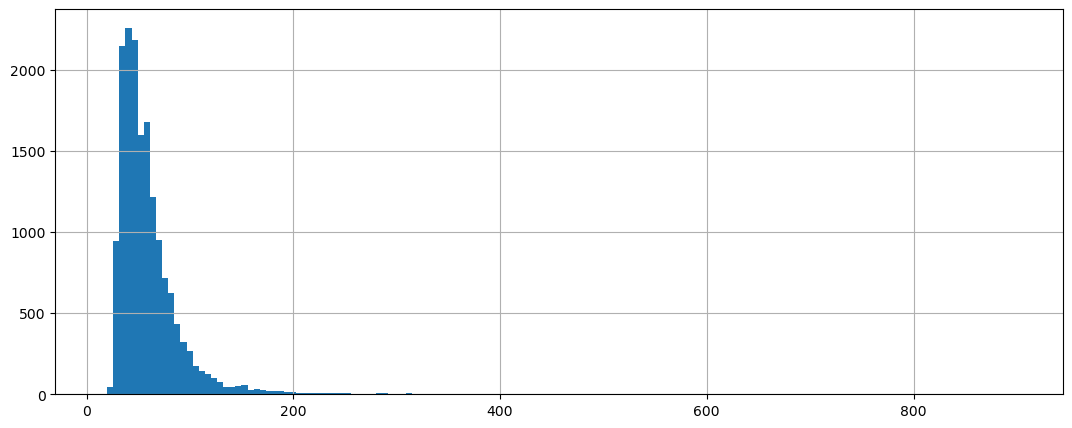

In [58]:
data['total_area'].hist(bins=150, figsize=(13, 5))

Значения кажутся аномальными, проверю все параметры по этим объектам

In [59]:
data[data['total_area'] > 300]

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
478,660,3,49.9500,483.9,2017-10-04,7,3.20,6.0,312.5,4,False,False,False,26.4,0,Санкт-Петербург,23079.0,945.0,3,461.0,3,22.0,391,103223,среда,октябрь,2017,другой,1.0
574,793,20,135.0000,310.0,2018-05-22,4,3.30,5.0,250.0,2,False,False,False,50.0,0,Санкт-Петербург,34159.0,7251.0,2,295.0,3,190.0,342,435483,вторник,май,2018,другой,7.0
632,866,5,25.0000,363.0,2017-12-23,14,3.16,5.0,222.0,4,False,False,False,16.6,0,Санкт-Петербург,38076.0,7950.0,0,NaN,2,435.0,418,68870,суббота,декабрь,2017,другой,8.0
792,1085,16,75.0000,323.0,2017-07-10,5,4.00,5.0,255.7,4,False,False,False,66.0,0,Санкт-Петербург,23713.0,594.0,3,398.0,2,515.0,259,232198,понедельник,июль,2017,другой,1.0
1071,1494,10,65.0000,364.0,2018-11-27,7,3.90,6.0,250.0,3,False,False,False,20.0,0,Санкт-Петербург,21988.0,3254.0,0,NaN,1,689.0,46,178571,вторник,ноябрь,2018,другой,3.0
1790,2580,6,30.9000,338.6,2017-10-16,7,3.86,6.0,230.0,4,False,False,False,20.0,0,Санкт-Петербург,24957.0,5641.0,0,NaN,0,NaN,406,91258,понедельник,октябрь,2017,другой,6.0
3477,5042,20,35.0000,380.0,2017-08-17,6,2.65,3.0,198.0,2,False,False,False,50.0,0,Пушкин,18490.0,30643.0,1,527.0,1,668.0,15,92105,четверг,август,2017,другой,31.0
3709,5358,20,65.0000,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14,110169,четверг,февраль,2019,другой,5.0
4304,6221,8,34.0000,470.3,2018-01-14,4,2.65,3.0,248.7,3,False,False,False,40.0,0,Санкт-Петербург,43756.0,15459.0,1,852.0,3,122.0,179,72294,воскресенье,январь,2018,последний,15.0
4589,6621,20,99.0000,488.0,2017-04-09,5,2.95,20.0,216.0,17,False,False,False,50.0,0,Санкт-Петербург,27641.0,4598.0,1,646.0,1,368.0,351,202868,воскресенье,апрель,2017,другой,5.0


Все в порядке, это аномально большие квартиры

#### Жилая площадь

<Axes: >

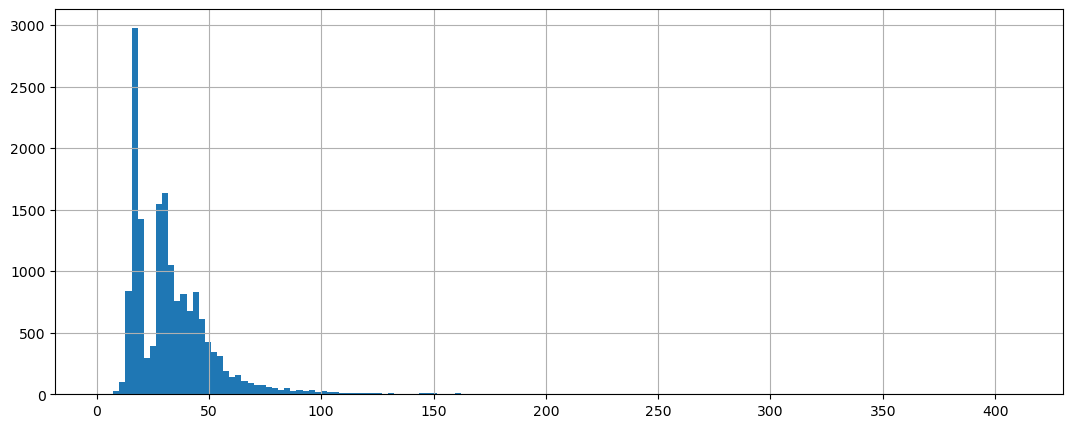

In [60]:
data['living_area'].hist(bins=150, figsize=(13, 5))

Значения кажутся аномальными, проверю все параметры по этим объектам

In [61]:
data[data['living_area'] > 250]

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
478,660,3,49.950,483.9,2017-10-04,7,3.20,6.0,312.5,4,False,False,False,26.4,0,Санкт-Петербург,23079.0,945.0,3,461.0,3,22.0,391,103223,среда,октябрь,2017,другой,1.0
792,1085,16,75.000,323.0,2017-07-10,5,4.00,5.0,255.7,4,False,False,False,66.0,0,Санкт-Петербург,23713.0,594.0,3,398.0,2,515.0,259,232198,понедельник,июль,2017,другой,1.0
3709,5358,20,65.000,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14,110169,четверг,февраль,2019,другой,5.0
5593,8018,20,84.000,507.0,2015-12-17,5,4.45,7.0,301.5,7,True,False,False,45.5,1,Санкт-Петербург,NaN,5735.0,2,110.0,0,NaN,1078,165680,четверг,декабрь,2015,последний,6.0
8648,12401,20,91.500,495.0,2017-06-19,7,4.65,7.0,347.5,7,False,False,False,25.0,0,Санкт-Петербург,NaN,5735.0,2,110.0,0,NaN,14,184848,понедельник,июнь,2017,последний,6.0
9829,14088,8,51.000,402.0,2017-02-07,6,3.15,8.0,300.0,6,False,False,False,56.0,2,Санкт-Петербург,24484.0,5052.0,1,253.0,0,NaN,32,126865,вторник,февраль,2017,другой,5.0
10120,14498,6,32.250,374.6,2018-06-09,19,2.65,5.0,264.5,2,False,False,False,27.6,0,Санкт-Петербург,19497.0,3574.0,0,NaN,2,548.0,114,86091,суббота,июнь,2018,другой,4.0
10917,15651,20,300.000,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,False,False,70.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111,485436,понедельник,декабрь,2017,другой,5.0
13654,19540,8,420.000,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106,466666,среда,декабрь,2017,последний,8.0
13875,19865,20,180.000,347.0,2015-01-21,8,3.90,6.0,260.0,3,False,False,False,45.0,0,Санкт-Петербург,23962.0,3794.0,2,537.0,3,501.0,834,518731,среда,январь,2015,другой,4.0


Все в порядке, это аномально большие квартиры

#### Площадь кухни

<Axes: >

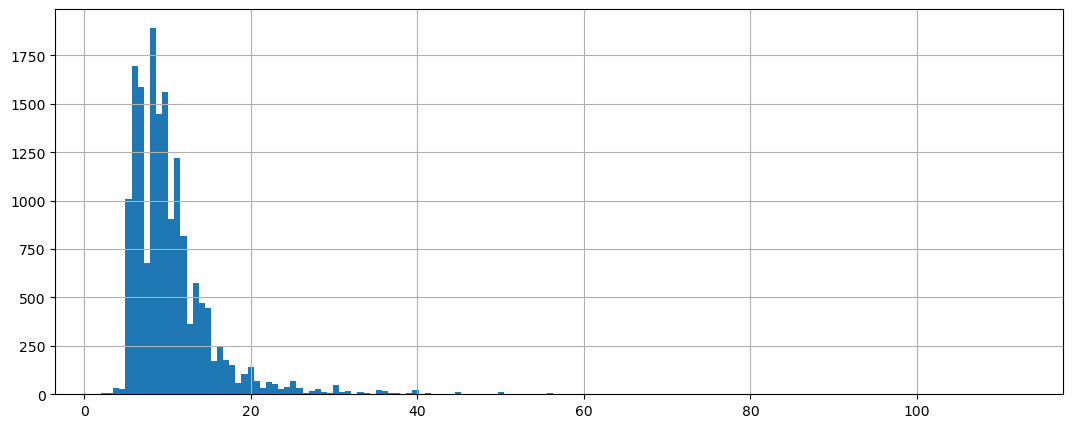

In [62]:
data['kitchen_area'].hist(bins=150, figsize=(13, 5))

Значения кажутся аномальными, проверю все параметры по этим объектам

In [63]:
data[data['kitchen_area'] > 60]

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
357,492,18,95.00,216.0,2017-12-05,4,3.00,5.0,86.0,4,False,False,False,77.0,0,Санкт-Петербург,21740.0,436.0,2,138.0,3,620.0,14,439814,вторник,декабрь,2017,другой,0.0
792,1085,16,75.00,323.0,2017-07-10,5,4.00,5.0,255.7,4,False,False,False,66.0,0,Санкт-Петербург,23713.0,594.0,3,398.0,2,515.0,259,232198,понедельник,июль,2017,другой,1.0
1730,2489,9,12.50,255.0,2017-04-21,3,2.65,2.0,153.9,2,False,False,False,100.7,0,Санкт-Петербург,29544.0,6916.0,0,NaN,3,198.0,102,49019,пятница,апрель,2017,последний,7.0
3038,4394,20,57.00,174.0,2015-11-09,3,3.20,10.0,95.0,6,False,False,False,77.0,0,Санкт-Петербург,31706.0,4166.0,1,193.0,3,199.0,1039,327586,понедельник,ноябрь,2015,другой,4.0
3709,5358,20,65.00,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14,110169,четверг,февраль,2019,другой,5.0
4283,6193,19,24.30,230.0,2016-06-03,4,2.65,3.0,90.0,2,False,False,False,70.0,0,Санкт-Петербург,39422.0,15354.0,0,NaN,1,345.0,397,105652,пятница,июнь,2016,другой,15.0
5265,7543,20,130.00,307.8,2016-04-24,5,2.65,4.0,187.9,3,False,False,False,63.4,0,Санкт-Петербург,24899.0,4785.0,0,NaN,1,603.0,1094,422352,воскресенье,апрель,2016,другой,5.0
9150,13139,20,55.00,288.0,2017-11-14,5,3.51,6.0,100.7,2,False,False,False,62.0,0,Санкт-Петербург,26228.0,4930.0,2,175.0,1,682.0,338,190972,вторник,ноябрь,2017,другой,5.0
10212,14644,17,47.00,150.0,2017-02-28,4,3.70,6.0,58.0,5,False,False,False,75.0,1,Санкт-Петербург,16085.0,7616.0,0,NaN,0,NaN,507,313333,вторник,февраль,2017,другой,8.0
10387,14900,20,25.90,125.6,2018-08-14,2,4.00,4.0,42.7,4,False,False,False,62.5,2,Пушкин,13426.0,25580.0,0,NaN,0,NaN,194,206210,вторник,август,2018,последний,26.0


Все в порядке, это аномально большие квартиры

#### Цена объекта

<Axes: >

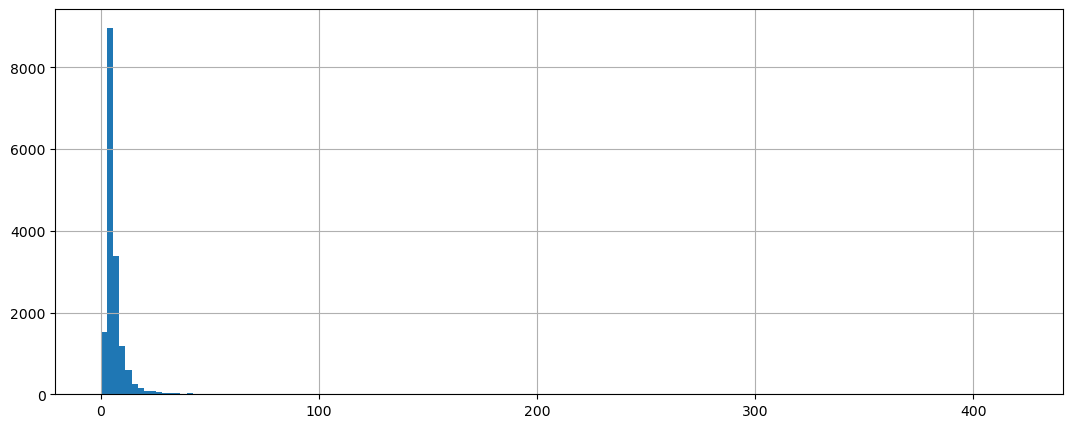

In [64]:
data['last_price'].hist(bins=150, figsize=(13, 5))

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут можно разделить все значения в столбце last_price на 1 млн, чтобы они пришли в более понятный вид)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Добавил ячейку с кодом в начале 4 раздела. Стало лучше, спасибо!
    Дальше сделаю новую ячейку, где будет график с ценами ниже 90 млн
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Супер!
</div>

Значения кажутся аномальными, проверю все параметры по этим объектам

In [65]:
data[data['last_price'] > 90000000]

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km


In [66]:
data[data['last_price'] > 90]

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
357,492,18,95.000,216.0,2017-12-05,4,3.00,5.0,86.00,4,False,False,False,77.00,0,Санкт-Петербург,21740.0,436.0,2,138.0,3,620.0,14,439814,вторник,декабрь,2017,другой,0.0
574,793,20,135.000,310.0,2018-05-22,4,3.30,5.0,250.00,2,False,False,False,50.00,0,Санкт-Петербург,34159.0,7251.0,2,295.0,3,190.0,342,435483,вторник,май,2018,другой,7.0
865,1188,20,118.000,290.6,2018-06-01,6,3.82,6.0,188.70,3,False,False,False,22.00,1,Санкт-Петербург,25309.0,6224.0,1,217.0,0,NaN,316,406056,пятница,июнь,2018,другой,6.0
940,1300,14,120.000,280.0,2018-07-12,5,4.70,4.0,162.00,3,False,False,False,30.00,0,Санкт-Петербург,24680.0,4247.0,1,464.0,3,339.0,225,428571,четверг,июль,2018,другой,4.0
1034,1436,19,330.000,190.0,2018-04-04,3,3.50,7.0,95.00,5,False,False,False,40.00,0,Санкт-Петербург,23011.0,1197.0,3,519.0,3,285.0,233,1736842,среда,апрель,2018,другой,1.0
1355,1928,11,125.000,224.5,2017-01-24,4,2.65,4.0,163.50,3,False,False,False,30.00,1,Санкт-Петербург,22805.0,2335.0,0,NaN,2,497.0,174,556792,вторник,январь,2017,другой,2.0
1762,2536,16,159.984,242.4,2015-08-27,4,3.85,9.0,131.00,7,False,False,False,20.00,0,Санкт-Петербург,21946.0,2242.0,1,679.0,1,227.0,501,660000,четверг,август,2015,другой,2.0
3446,4996,20,124.000,124.5,2017-10-12,4,3.00,4.0,67.20,2,False,False,False,20.00,0,Санкт-Петербург,20399.0,1722.0,3,302.0,3,172.0,45,995983,четверг,октябрь,2017,другой,2.0
4589,6621,20,99.000,488.0,2017-04-09,5,2.95,20.0,216.00,17,False,False,False,50.00,0,Санкт-Петербург,27641.0,4598.0,1,646.0,1,368.0,351,202868,воскресенье,апрель,2017,другой,5.0
5265,7543,20,130.000,307.8,2016-04-24,5,2.65,4.0,187.90,3,False,False,False,63.40,0,Санкт-Петербург,24899.0,4785.0,0,NaN,1,603.0,1094,422352,воскресенье,апрель,2016,другой,5.0


Все в порядке, это аномально дорогие квартиры

#### Количество комнат

<Axes: >

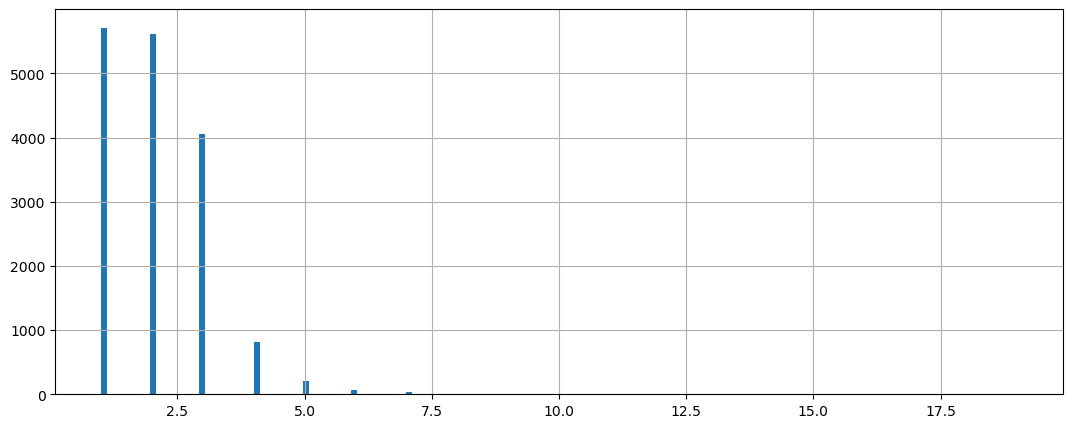

In [67]:
data['rooms'].hist(bins=150, figsize=(13, 5))

Значения кажутся аномальными, проверю все параметры по этим объектам

In [68]:
data[data['rooms'] > 10]

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
632,866,5,25.000,363.0,2017-12-23,14,3.16,5.0,222.0,4,False,False,False,16.6,0,Санкт-Петербург,38076.0,7950.0,0,NaN,2,435.0,418,68870,суббота,декабрь,2017,другой,8.0
3709,5358,20,65.000,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14,110169,четверг,февраль,2019,другой,5.0
6762,9688,8,33.000,194.1,2017-02-07,11,3.43,5.0,129.0,2,False,False,False,11.9,0,Санкт-Петербург,21469.0,1015.0,1,686.0,2,66.0,813,170015,вторник,февраль,2017,другой,1.0
10120,14498,6,32.250,374.6,2018-06-09,19,2.65,5.0,264.5,2,False,False,False,27.6,0,Санкт-Петербург,19497.0,3574.0,0,NaN,2,548.0,114,86091,суббота,июнь,2018,другой,4.0
13168,18848,6,28.500,270.0,2015-03-02,16,3.00,4.0,180.0,4,False,False,False,13.0,1,Санкт-Петербург,23575.0,4142.0,1,516.0,0,NaN,1365,105555,понедельник,март,2015,последний,4.0
13654,19540,8,420.000,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106,466666,среда,декабрь,2017,последний,8.0
14529,20829,6,28.659,245.4,2016-03-31,14,2.65,4.0,168.3,2,False,False,False,25.9,0,Санкт-Петербург,21104.0,2054.0,3,541.0,2,118.0,95,116784,четверг,март,2016,другой,2.0


Все в порядке, это аномально большие квартиры

#### Высота потолков

<Axes: >

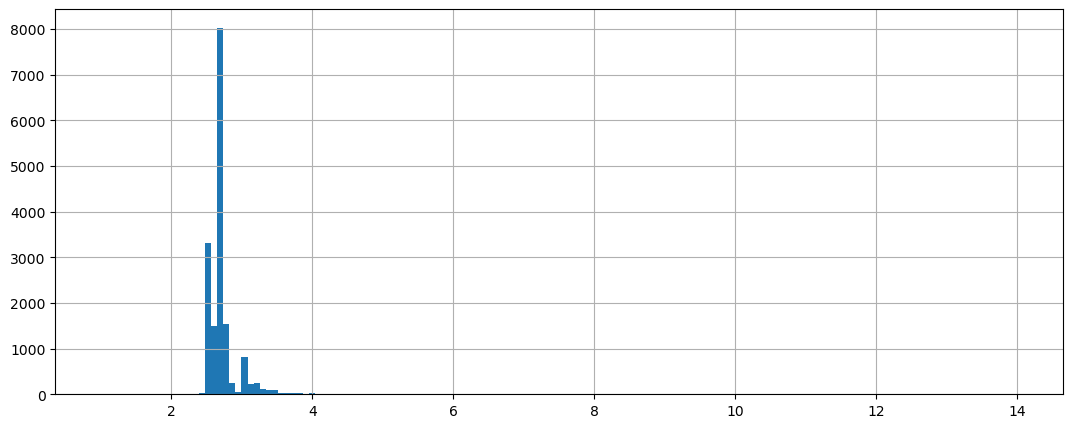

In [69]:
data['ceiling_height'].hist(bins=150, figsize=(13, 5))

Кажется тут есть аномальные значения. 

In [70]:
data[data['ceiling_height'] > 6]

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
2401,3474,3,1.40,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,False,False,7.3,0,деревня Нурма,NaN,NaN,0,NaN,0,NaN,125,46666,пятница,март,2018,другой,NaN
4063,5863,20,5.65,45.0,2018-08-15,1,8.3,16.0,19.3,14,False,False,False,8.3,1,Санкт-Петербург,13069.0,10763.0,0,NaN,1,613.0,14,125555,среда,август,2018,другой,11.0
10513,15061,19,5.60,56.4,2018-05-11,2,14.0,14.0,32.4,5,False,False,False,9.1,2,Санкт-Петербург,14814.0,13610.0,0,NaN,0,NaN,315,99290,пятница,май,2018,другой,14.0
10982,15743,14,5.60,67.0,2016-11-11,3,8.0,16.0,41.0,1,False,False,False,8.0,0,Санкт-Петербург,32691.0,11035.0,1,723.0,0,NaN,474,83582,пятница,ноябрь,2016,первый,11.0


Видно, что 14 метров потолки по значению схожи с количеством этажей в доме, скорее всего это человеческий фактор. Остальные значения просто аномальны, учитывая их обычную стоимость и обычную площадь. Заменим все значения на медианы.

In [71]:
data.loc[(2401, 4063, 10513, 10982), 'ceiling_height'] = data['ceiling_height'].median()

#### Тип этажа квартиры

<Axes: >

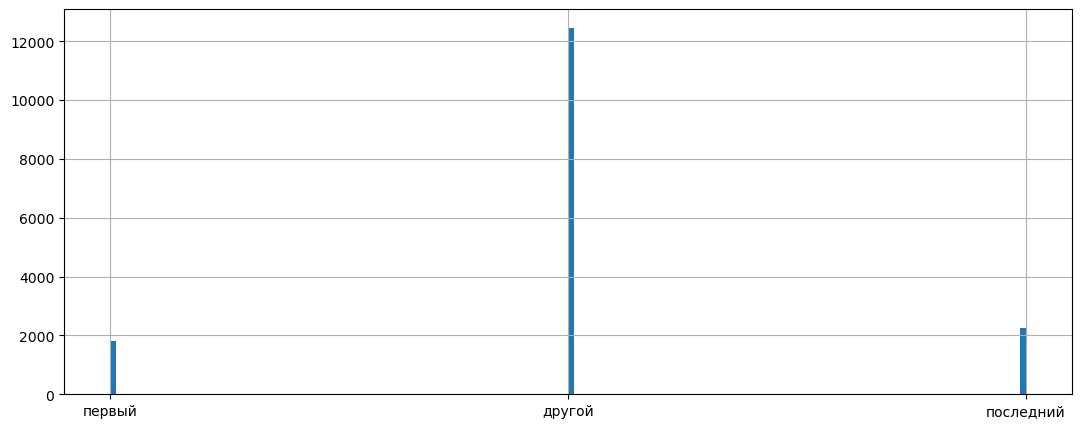

In [72]:
data['floor_type'].hist(bins=150, figsize=(13, 5))

Тут все в порядке, никаких аномальных значений.

#### Общее количество этажей в доме

<Axes: >

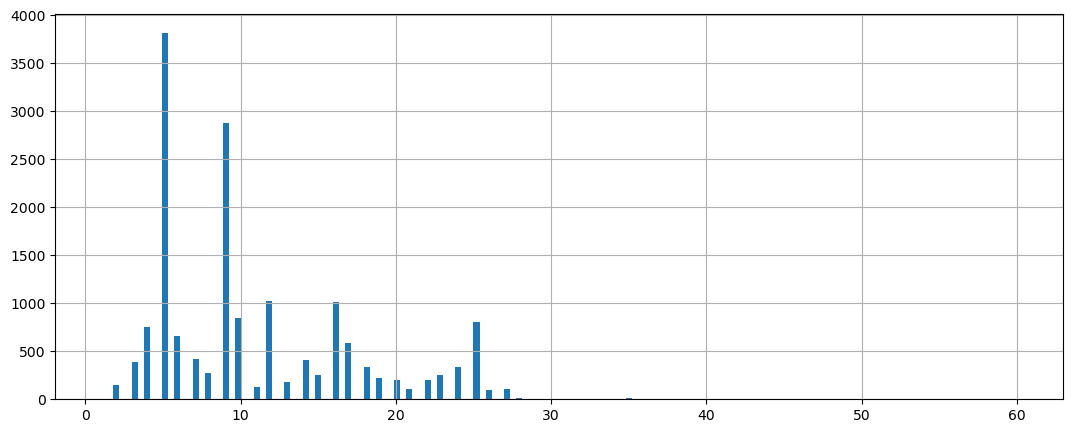

In [73]:
data['floors_total'].hist(bins=150, figsize=(13, 5))

In [74]:
data[data['floors_total'] > 40]

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
1569,2253,12,3.800,45.5,2018-06-28,2,2.88,60.0,27.4,4,False,False,False,7.4,0,Кронштадт,67763.0,49488.0,2,342.0,3,614.0,166,83516,четверг,июнь,2018,другой,49.0
11689,16731,9,3.978,40.0,2018-09-24,1,2.65,52.0,10.5,18,False,False,False,14.0,0,Санкт-Петербург,20728.0,12978.0,1,793.0,0,NaN,45,99450,понедельник,сентябрь,2018,другой,13.0


Здесь аномальные значения выделяются. Да конечно высотки с этажностью больше 40 этажей существуют, но не в Санкт-Петербурге. Удалю эти строки.

In [75]:
data = data[data['floors_total'] < 40]

In [76]:
data['floors_total'] = data['floors_total'].astype(int)

#### Расстояние до центра города в метрах

<Axes: >

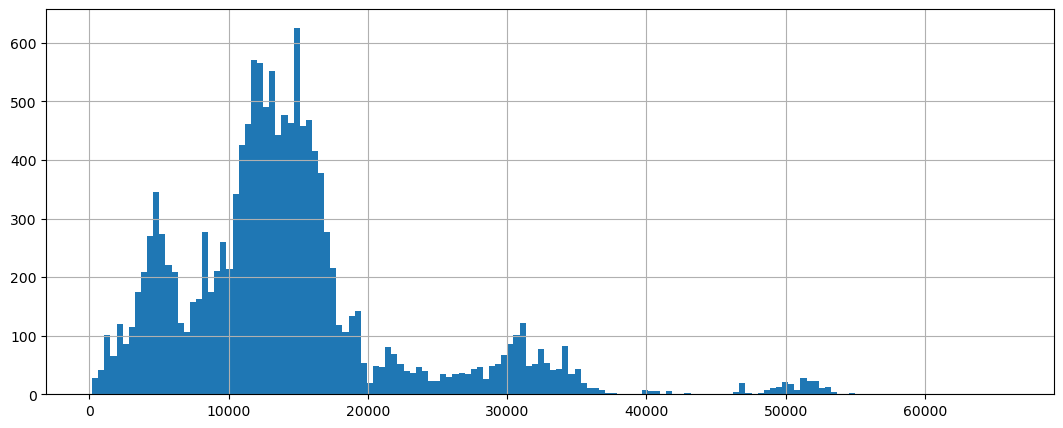

In [77]:
data['cityCenters_nearest'].hist(bins=150, figsize=(13, 5))

Здесь выделяется только значение в 100 км. Это объекты находящиеся не в Санкт-Петербурге.

#### Расстояние до ближайшего парка

<Axes: >

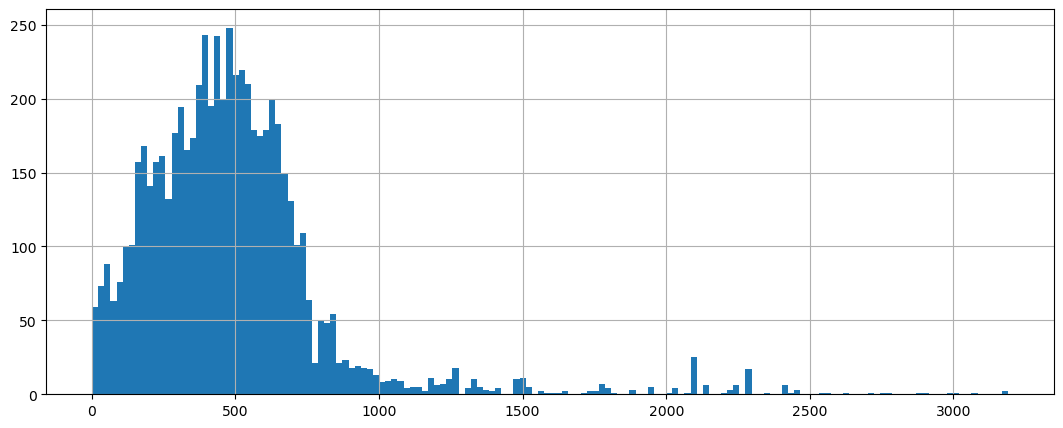

In [78]:
data['parks_nearest'].hist(bins=150, figsize=(13, 5))

Здесь выделяется только значение 5 км. Это значение говорит о том, что програмно парков в ближайшем окружении не найдено.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! Не забудь пересмотреть выводы после правок в предыдущем разделе
</div>

### Как быстро продавались квартиры?

<Axes: >

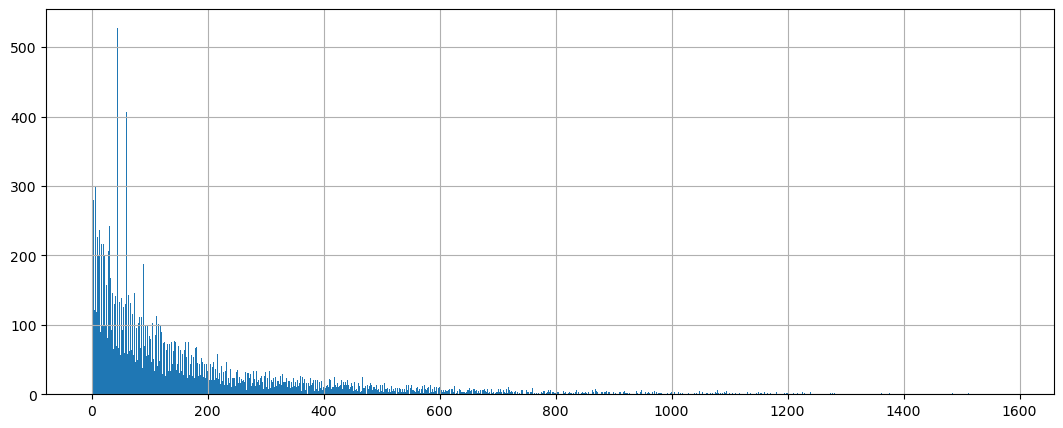

In [79]:
data['days_exposition'].hist(bins=1000, figsize=(13, 5))

На гистрограмме видно, что большая часть продаж происходит в первые 200 дней

In [80]:
data[data['days_exposition'] < 200]['days_exposition'].count()

11568

In [81]:
data['days_exposition'].count()

16481

11568 квартир из 16481 проданы в первые 200 дней. Это 2/3 всех продаж.

In [82]:
data[data['days_exposition'] < 100]['days_exposition'].count()

8176

При этом 8176 квартир(половина от общего объема) проданы в первые 100 дней.

Максимальное значение здесь кажется невероятным. тяжело поверить, что люди могут продавать свои квартиры больше 4 лет

Посмотрю какие значения чаще встречатся

<Axes: >

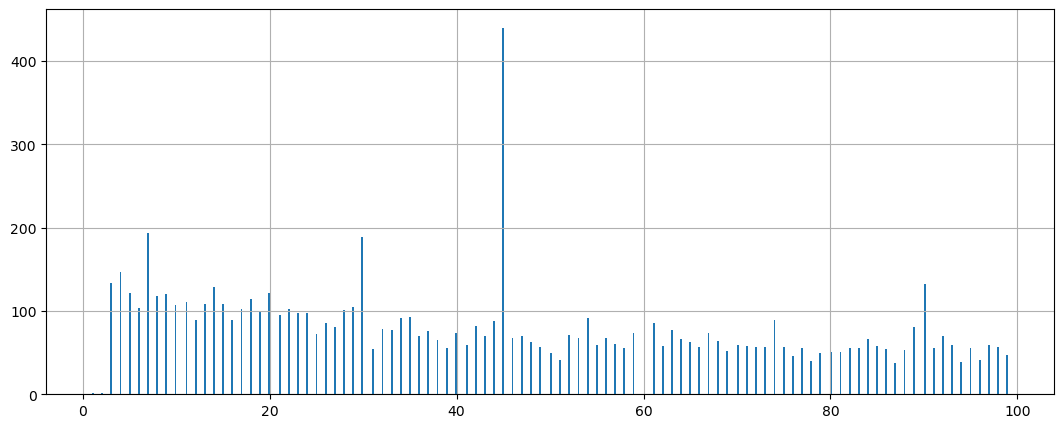

In [83]:
data[data['days_exposition'] < 100]['days_exposition'].hist(bins=500, figsize=(13, 5))

In [84]:
data['days_exposition'].value_counts().head(10)

days_exposition
45    440
60    321
7     194
30    189
4     147
3     133
90    132
14    129
5     122
20    121
Name: count, dtype: int64

Увеличив масштаб гистограммы видно, что есть всплески продаж в определенные дни. Скорее всего в этот день приходит какое то уведомление и люди вспоминают, что у них висело объявление, а по факту они квартиру уже продали, просто на радостях забыли про объявление. В целом до 100 дней продажи идут хорошо, но лучше всего в первые 20 дней. А самые первые в этом списке и самые быстрые, но не случайные продажи закрываются за 7 дней.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Здорово, что ты заметил эти всплески! Это действительно особенность функционирования системы размещения объявлений. Убедиться в этом можно по ссылке ниже

	https://yandex.ru/support/realty/owner/home/add-ads-housing.html
</div>

In [85]:
data['days_exposition'].mean()

185.75887385474184

In [86]:
data['days_exposition'].median()

101.0

Среднее значение говорит о том, что все продается в среднем за 185 дней, хотя медиана показывает не совершенство среднего показателя. По медиане значение - 101. 

### Факторы, которые больше всего влияют на общую (полную) стоимость объекта.

#### Зависит ли цена от общей площади?

<Axes: xlabel='total_area', ylabel='last_price'>

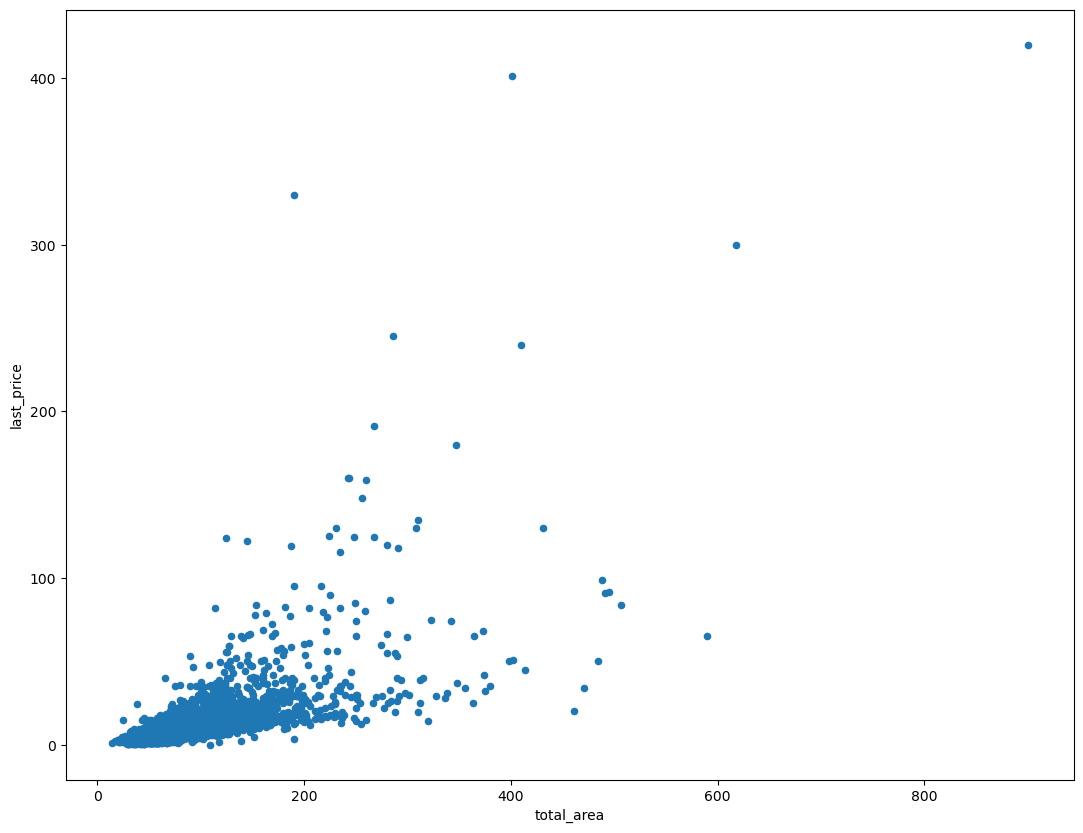

In [87]:
data .sort_values('last_price').plot(y='last_price', x='total_area', kind='scatter', figsize=(13,10))

Видно, что значения взаимно идут на увелечение, но попробую увеличить масштаб и показать направление линией.

<Axes: xlabel='total_area'>

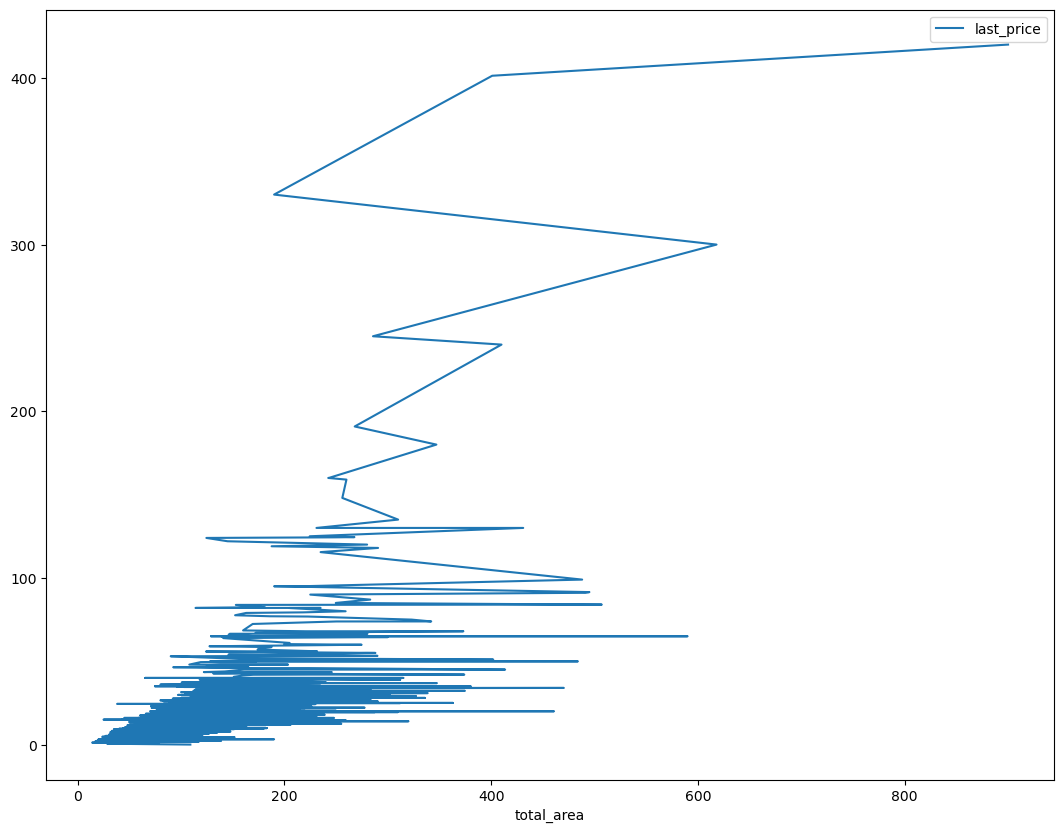

In [88]:
data[data['last_price'] < 100000000].sort_values('last_price').plot(y='last_price', x='total_area', figsize=(13,10))

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Лучше поменять столбцы в x и y местами. 
</div>

До 40 млн руб направление не разобрать, а после этого порога видно, что цена растет, а площадь то больше. то меньше. Посмотрю на ситуацию до 40 млн руб.

<Axes: xlabel='total_area'>

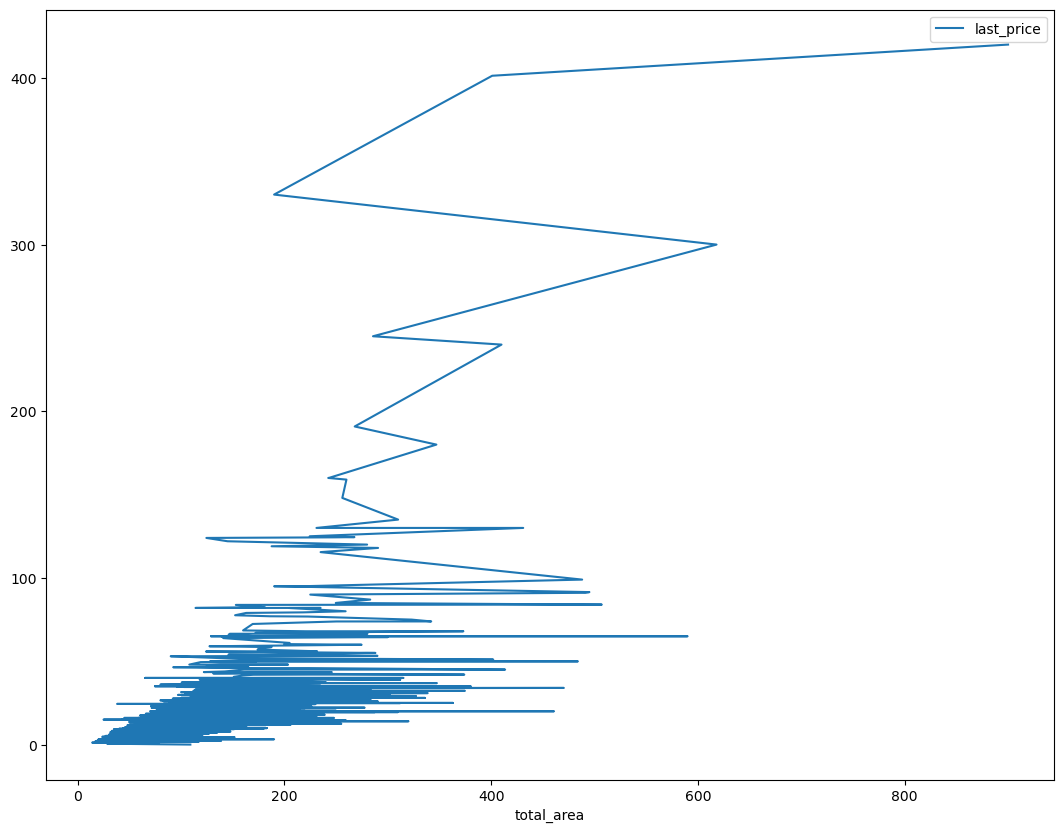

In [89]:
data[data['last_price'] < 40000000].sort_values('last_price').plot(y='last_price', x='total_area', figsize=(13,10))

Ситуация такая же. Общая тенденция на подъем цены при увеличении площади, но при этом разброс площади при одной и той же цене виден по ширине фигуры, которая у нас получилась.

Вывод: В общей массей цена растет с общей площадью квартиры

#### Зависит ли цена от жилой площади?

<Axes: xlabel='living_area'>

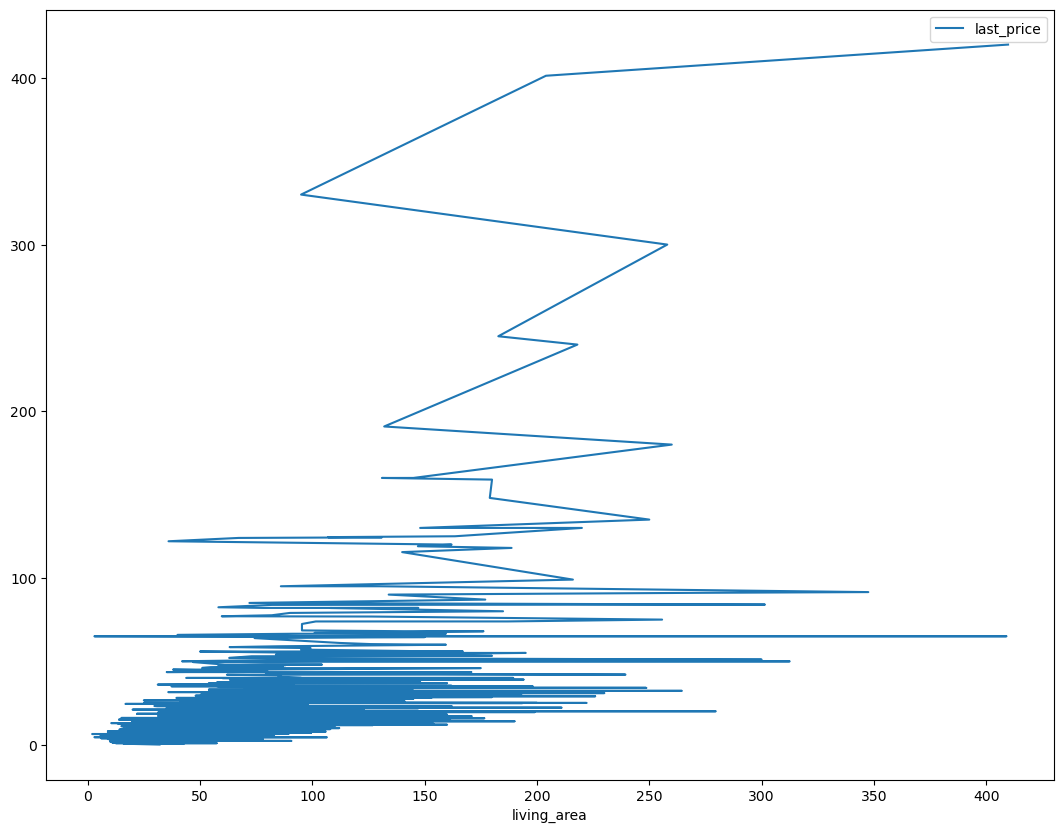

In [90]:
data.sort_values('last_price').plot(y='last_price', x='living_area', figsize=(13,10))

<Axes: xlabel='living_area'>

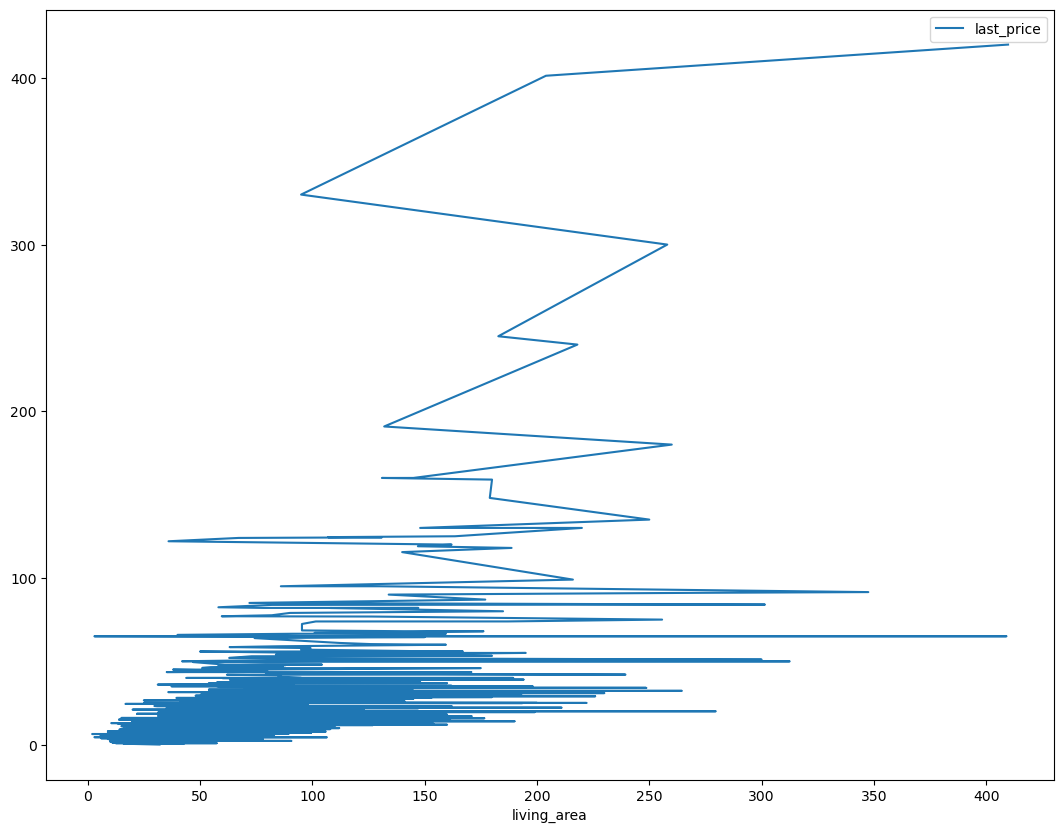

In [91]:
data[data['last_price'] < 40000000].sort_values('last_price').plot(y='last_price', x='living_area', figsize=(13,10))

Ситуация такая же как с общей площадью, в целом с подъемом цены поднимается и площадь, но как будто по уровням. На каждом этапе цены есть довольно большой спектр жилой площади.

Вывод: В общей массей цена растет с жилой площадью квартиры

#### Зависит ли цена от площади кухни?

<Axes: xlabel='kitchen_area'>

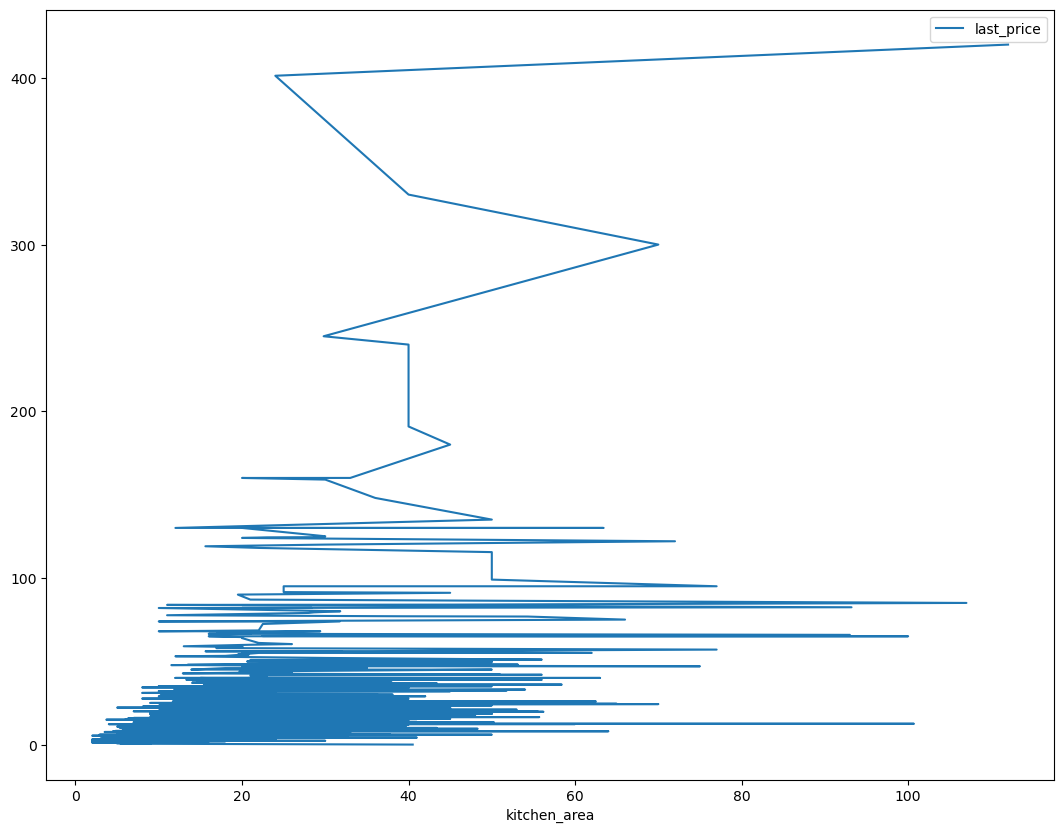

In [92]:
data.sort_values('last_price').plot(y='last_price', x='kitchen_area', figsize=(13,10))

Видно, что среди низа стоимости и среды высоких показателей стоимости, есть кухни с площпдями до 20 кв и от 60 кв метров.

#### Зависит ли цена от количества комнат?

<Axes: xlabel='rooms'>

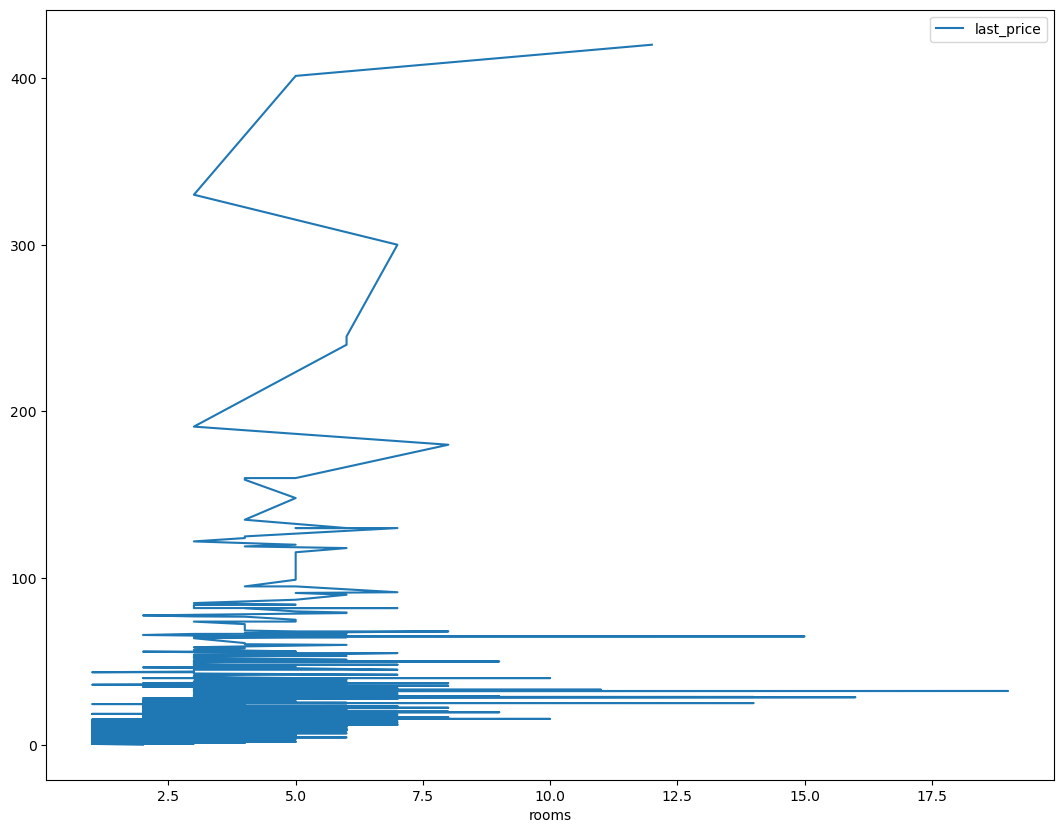

In [93]:
data.sort_values('last_price').plot(y='last_price', x='rooms', figsize=(13,10))

<Axes: xlabel='rooms'>

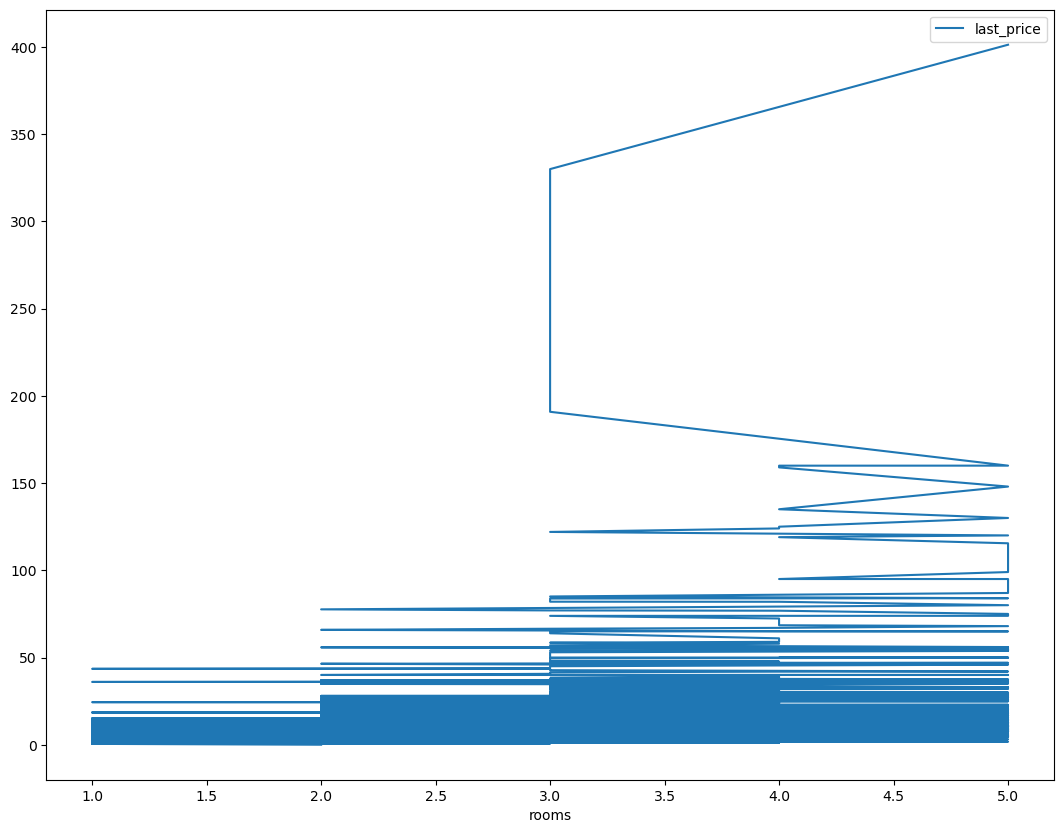

In [94]:
data[data['rooms'] < 6].sort_values('last_price').plot(y='last_price', x='rooms', figsize=(13,10))

Увеличил площадь, сократив количество комнат до 5 в квартире. До 3 комнат квартиры дорожают с увеличением комнат. Далее цена растет, а количество комнат скачет от трех к пяти. 

Вывод: Количество комнат влияет на стоимость квартиры, но до определенной стоимости.

#### Зависит ли цена от этажа на котором расположена квартира?

data.plot(y='last_price', x='floor_type', kind='scatter', figsize=(13,10))

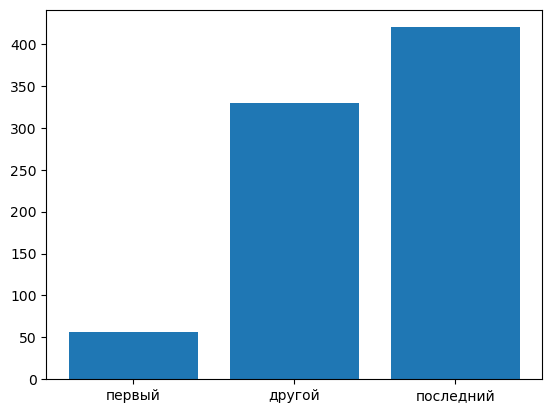

In [95]:
plt.bar(data['floor_type'], data['last_price']);

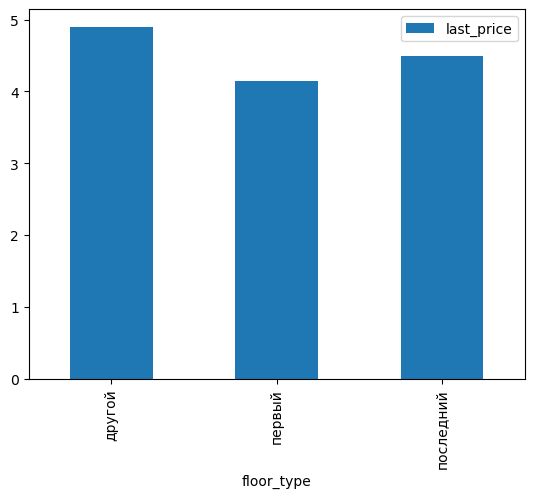

In [96]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot.bar();

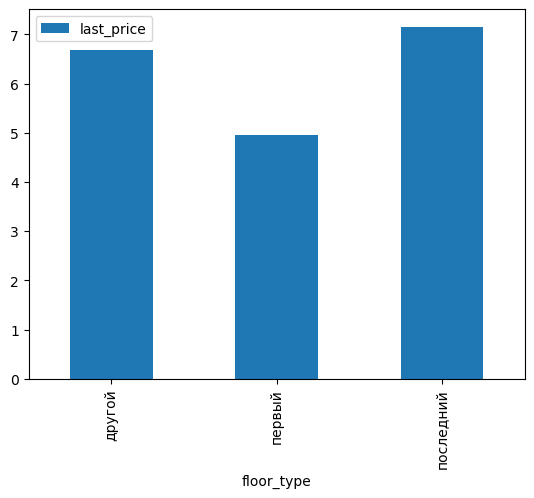

In [97]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='mean').plot.bar();

Здесь можно заметить, что самый дорогой тип этажа - последний, а самый низкий параметр, среди всех максимальный у первого этажа. 

Вывод: квартиры на первом этаже гораздо дешевле остальных. Квартиры на последнем этаже ценятся больше.

<div class="alert alert-info">
<b>Комментарий студента(v2):</b>
<br>Новый вывод ниже
</div>

Графики по среднему значению и медиане отличаются борьбой "последних" и "других" этажей. В среднем значении "последний" уходит вперед за счет больших значений цены, что может быть обусловлено и другими факторами, например общая и жилая площадь. Поэтому лучше смотерть на медиану.

Вывод: Если взять медианы значений стоимости по типу этажей, то самые дешевые на первом этаже, а "другие" продаются дороже.

#### Зависит ли цена от даты размещения объявления?

##### День недели

data.plot(y='last_price', x='weekday_exposition', kind='scatter', figsize=(13,10))

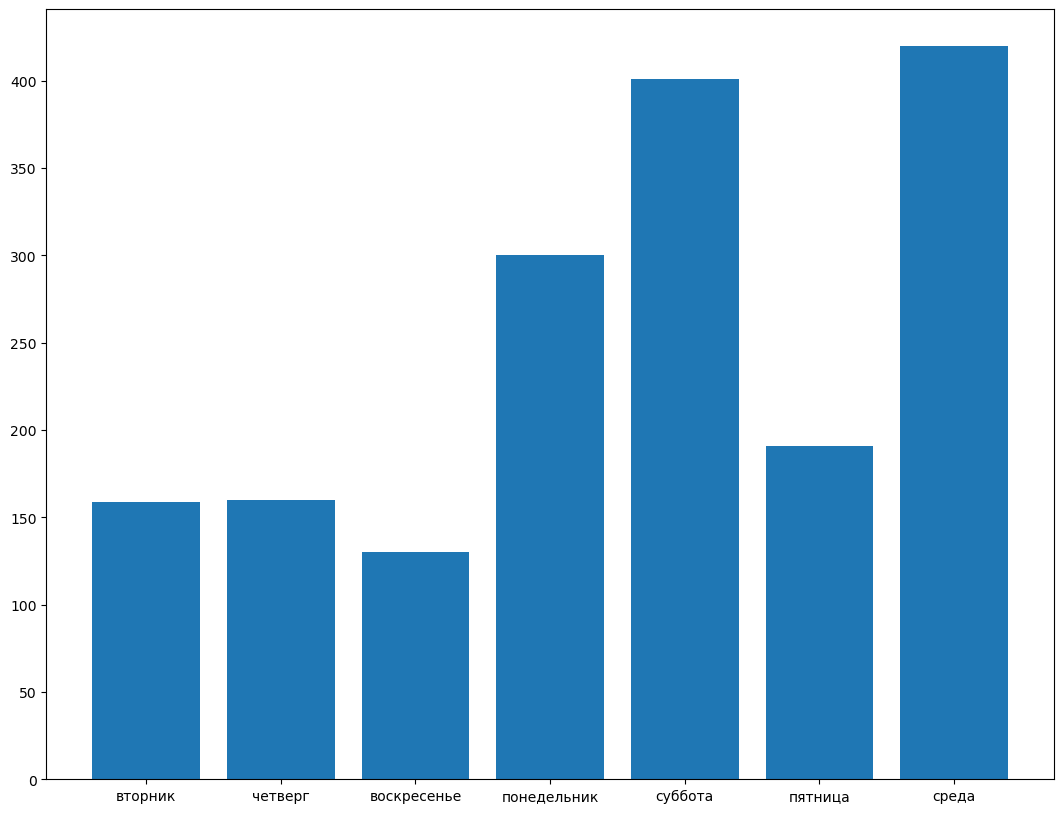

In [98]:
plt.figure(figsize=(13,10))
plt.bar(data['weekday_exposition'], data['last_price'])
plt.show()

Здесь можно увидеть, дни в которые были проданы самы дорогие квартиры - это среда и суббота, а самый низки показатель как не странно - воскресенье.

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Здесь был не прав. Это не дни в которые были проданы квартиры, а дни в которые были размещены объявления. 
    В целом дни размещения могут влиять на то что эти объявления больше людей увидит в начале и сделают какие то шаги к покупке(напишут сообщение, позвонят или добавят в избранное например)
</div>

In [99]:
data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median')

,last_price
weekday_exposition,
воскресенье,4.650
вторник,4.800
понедельник,4.775
пятница,4.650
среда,4.800
суббота,4.695
четверг,4.800


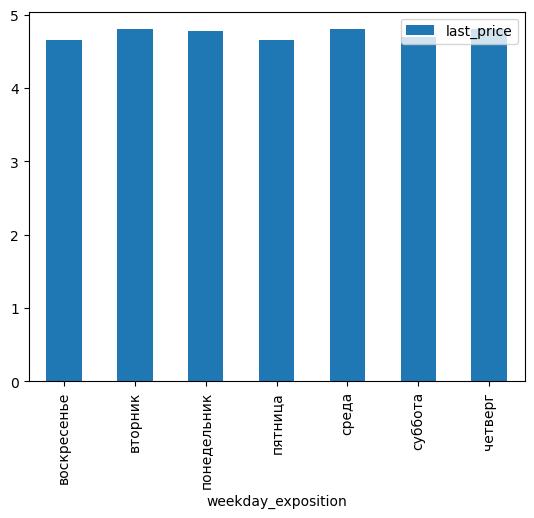

In [100]:
data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median').plot.bar();

<div class="alert alert-info">
<b>Комментарий студента(v2):</b>
<br>Новый вывод ниже
</div>

Отличия в цене минимальны(150 тыс.р.). День размещения объявления не влияет на итоговую стоимость объекта

##### Месяц

data.plot(y='last_price', x='month_exposition', kind='scatter', figsize=(13,10))

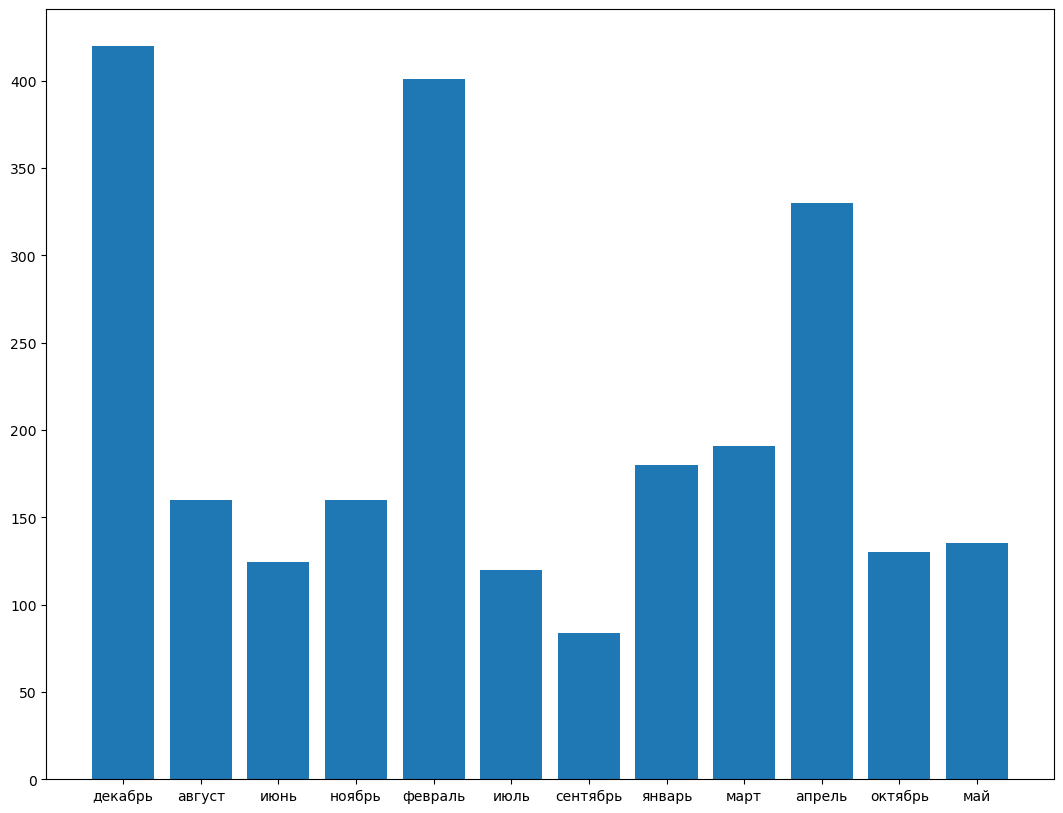

In [101]:
plt.figure(figsize=(13,10))
plt.bar(data['month_exposition'], data['last_price'])
plt.show()

Месяцы в которые были продано больше всего квартир - это декабрь и февраль.

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Здесь так же не месяц продажи, а месяц размещения объявления. Как было видно объявления могут висеть и 4 года. При этом быстрых продаж(в течении нескольких дней и месяца) очень много. Видимо зимой покупательская способность у людей больше. Возможно когда холодно, люди больше задумываются о жилищном вопросе. И апрель не просто так на третьем месте, так как сделки по продаже жилья могут быть очень долгими, то в апреле как раз могли закрываться зимние сделки.
</div>

In [102]:
data.pivot_table(index='month_exposition', values='last_price', aggfunc='median').sort_values('last_price')

,last_price
month_exposition,
июнь,4.515
май,4.600
октябрь,4.690
март,4.700
апрель,4.720
январь,4.730
июль,4.750
август,4.800
февраль,4.800


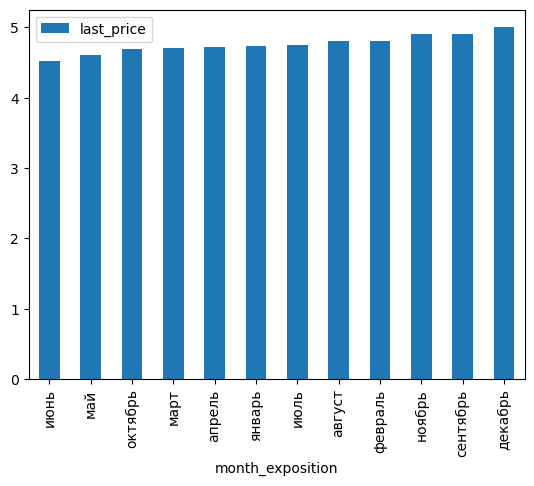

In [103]:
data.pivot_table(index='month_exposition', values='last_price', aggfunc='median').sort_values('last_price').plot.bar();

<div class="alert alert-info">
<b>Комментарий студента(v2):</b>
<br>Новый вывод ниже
</div>

Разница между декабрем и июнем 500 тыс.р. Это значительно. Месяц размещения объявления влияет на стоимость объекта. 

##### Год

data.plot(y='last_price', x='year_exposition', kind='scatter', figsize=(13,10))

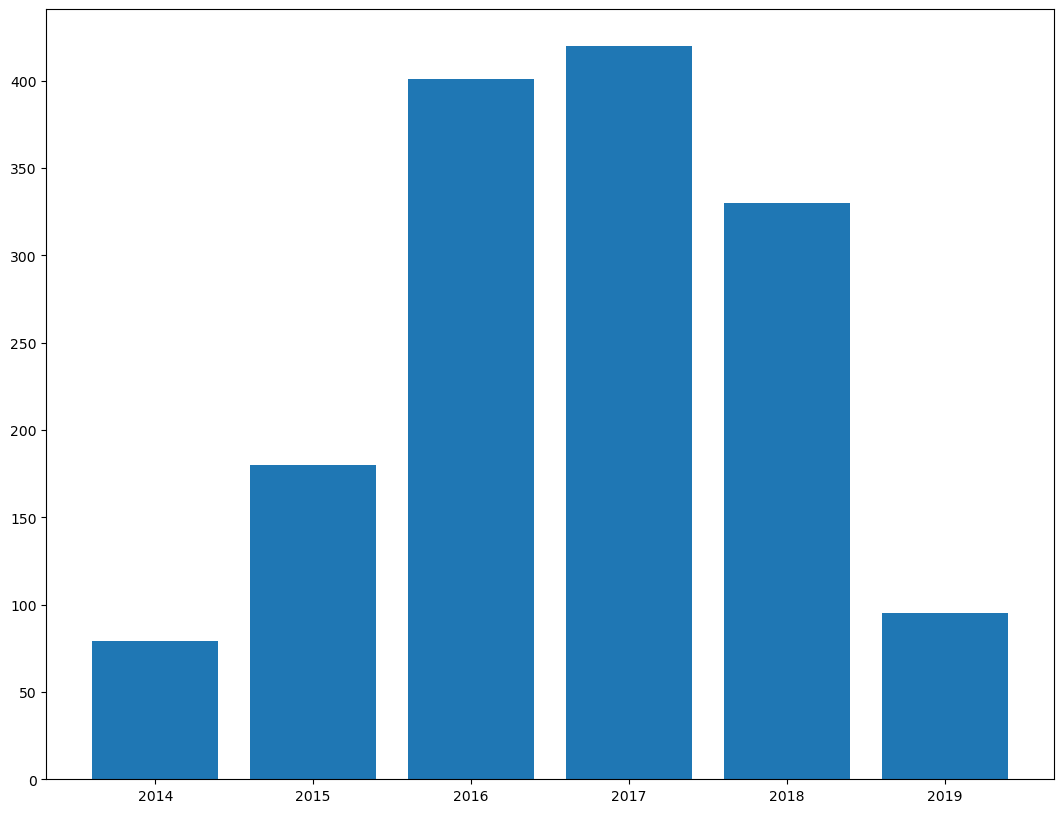

In [104]:
plt.figure(figsize=(13,10))
plt.bar(data['year_exposition'], data['last_price'])
plt.show()

2017 год был очень хорош для продажи дорогих квартир. Самый худший - 2014.

In [105]:
data.pivot_table(index='year_exposition', values='last_price', aggfunc='median').sort_values('last_price')

,last_price
year_exposition,
2016,4.600
2017,4.650
2018,4.800
2019,4.950
2015,5.200
2014,7.265


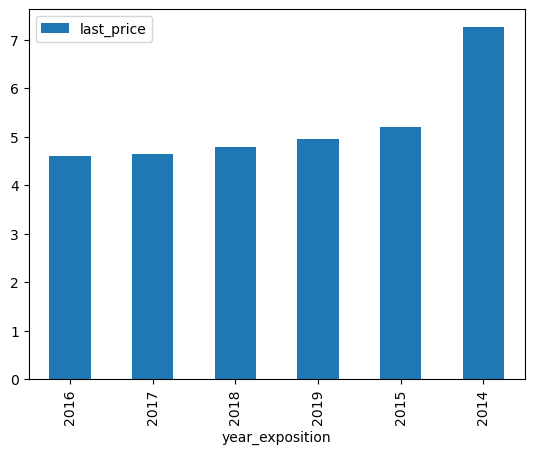

In [106]:
data.pivot_table(index='year_exposition', values='last_price', aggfunc='median').sort_values('last_price').plot.bar();

<div class="alert alert-info">
<b>Комментарий студента(v2):</b>
<br>Новый вывод ниже
</div>

Вывод: Дороже всего квартиры стоили в 2014 году. А дешевле всего в 2016. После 2016 года ситуация начала стабилизироваться.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Для категории этажа, дня, месяца и года продажи нужно построить barplot рассчитав среднее значение или медиану. После этого необходимо написать о зависимости цены от этих параметров
	
    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b> 
<br>Прежде чем строить график тебе нужно рассчитать среднее или медиану Построй сводную таблицу методом pivot_table, в index передай floor_type, в values общую цену, в aggfunc медиану. К этой таблице примени .plot.bar(). По аналогии сделай для всех трёх времен)
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b>
<br>Отлично! Теперь всё верно)
</div>

### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [107]:
data['locality_name'].value_counts().head(10)

locality_name
Санкт-Петербург      12178
поселок Шушары         366
Колпино                292
Пушкин                 278
поселок Мурино         268
поселок Парголово      264
Кудрово                225
Всеволожск             171
Гатчина                169
Петергоф               168
Name: count, dtype: int64

In [108]:
data[data['locality_name'] == 'Санкт-Петербург']['square_meter_price'].mean()

111553.1474790606

In [109]:
data[data['locality_name'] == 'поселок Шушары']['square_meter_price'].mean()

77752.15027322405

In [110]:
data[data['locality_name'] == 'Колпино']['square_meter_price'].mean()

74615.63698630137

In [111]:
data[data['locality_name'] == 'Пушкин']['square_meter_price'].mean()

102337.44244604316

In [112]:
data[data['locality_name'] == 'поселок Мурино']['square_meter_price'].mean()

85179.39925373135

In [113]:
data[data['locality_name'] == 'поселок Парголово']['square_meter_price'].mean()

90126.65909090909

In [114]:
data[data['locality_name'] == 'Кудрово']['square_meter_price'].mean()

94572.26222222223

In [115]:
data[data['locality_name'] == 'Всеволожск']['square_meter_price'].mean()

69720.2514619883

In [116]:
data[data['locality_name'] == 'Гатчина']['square_meter_price'].mean()

67740.4201183432

In [117]:
data[data['locality_name'] == 'Петергоф']['square_meter_price'].mean()

83096.72619047618

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10 по средней цене, так будет более наглядно)
</div>

### Cредняя стоимость на разном удалении от центра.

In [118]:
for k in range(100):
    cityCenters_nearest = data[data['cityCenters_nearest'] == k]['last_price'].mean()

cityCenters_nearest

nan

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16481 entries, 0 to 16513
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   16481 non-null  int64         
 1   total_images            16481 non-null  int64         
 2   last_price              16481 non-null  float64       
 3   total_area              16481 non-null  float64       
 4   first_day_exposition    16481 non-null  datetime64[ns]
 5   rooms                   16481 non-null  int64         
 6   ceiling_height          16481 non-null  float64       
 7   floors_total            16481 non-null  int64         
 8   living_area             16481 non-null  float64       
 9   floor                   16481 non-null  int64         
 10  is_apartment            16481 non-null  bool          
 11  studio                  16481 non-null  bool          
 12  open_plan               16481 non-null  bool       

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Здесь нужно рассчитать стоимость квадратного метра для каждого километра удаляясь от центра. Для этого лучше всего построить сводную таблицу. В index передай расстояние до центра в км, а в values цену за квадратный метр. Можно сравнить среднее значение и медианное
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Сделал, вывод ниже.
</div>

In [120]:
data.pivot_table(index='cityCenters_nearest_km', values='square_meter_price', aggfunc=('mean', 'median'))

,mean,median
cityCenters_nearest_km,,
0.0,235287.444444,150243.0
1.0,161343.060403,125565.0
2.0,158773.385965,119881.5
3.0,116405.395257,104257.0
4.0,127429.970986,112500.0
5.0,135655.792701,125368.0
6.0,145305.851016,124583.0
7.0,150857.677316,123581.0
8.0,123622.222222,120120.0


<Axes: xlabel='cityCenters_nearest_km'>

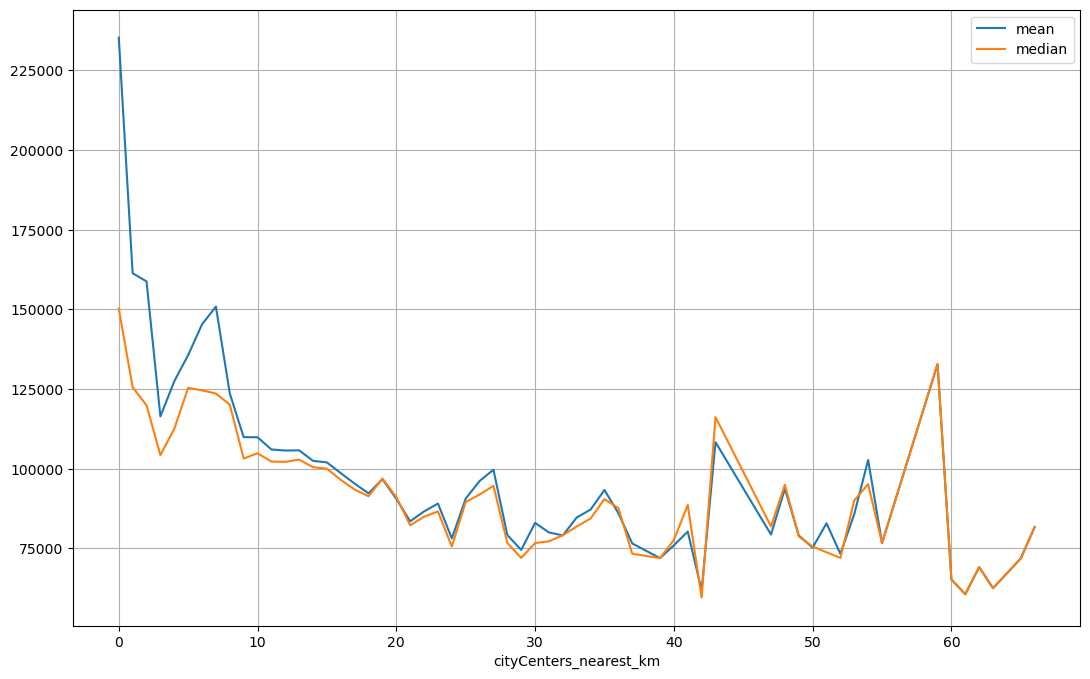

In [121]:
data.pivot_table(index='cityCenters_nearest_km', values='square_meter_price', aggfunc=('mean', 'median')).plot(figsize=(13, 8), grid=True)

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b> 
<br>В данных нужно оставить только Питер. У тебя график ушёл за 60км
</div>

На графике соотношение цены за квадратный метр к удаленности от центра города в километрах. Синим на графике обозначена средняя цена за квадратный метр, ораньжевым обозначена медиана цены за квадратный метр. 

Здесь можно заметить большую разницу на расстоянии до 10 км в среднем значении и медиане. Это обусловлено большим распылением цены в этих границах. Это видно еще потому что цена в районе 4 км падает и потом снова растет до значения расстояния 7 км. 

На расстоянии от 10 до 20 километров цена равномерно опускается. 

От 20 до 30 км видны скачки. На 27 км всплеск цены равен цене на расстоянии 15 км. Возможно это означает, что на этом расстоянии находятся хорошо развитые зоны.

На расстоянии 35 км так же виден всплеск с хорошо развитыми зонами. Конечно это не значит, что если квартира находится на линии окружности, радиус которой равен 35 км, то цена у нее будет выше. Просто скорее всего есть какой то квартал или район, где цены выше остальных. Но доля высокой цены за квадратный метр на этом радиусе велика, иначе бы была видна большая разница между медианой и средним значением.

На расстоянии больше 40 км от центра города виден большой всплеск цен поднимающийся до уровня удаленности 5-10 км. На этом расстоянии видимо находятся элитные кварталы. Скорее всего это загородная недвижимость.

In [122]:
data[data['locality_name'] == 'Санкт-Петербург'].pivot_table(index='cityCenters_nearest_km', values='square_meter_price', aggfunc=('mean', 'median'))

,mean,median
cityCenters_nearest_km,,
0.0,235287.444444,150243.0
1.0,161343.060403,125565.0
2.0,158773.385965,119881.5
3.0,116405.395257,104257.0
4.0,127429.970986,112500.0
5.0,135655.792701,125368.0
6.0,145305.851016,124583.0
7.0,150857.677316,123581.0
8.0,123622.222222,120120.0


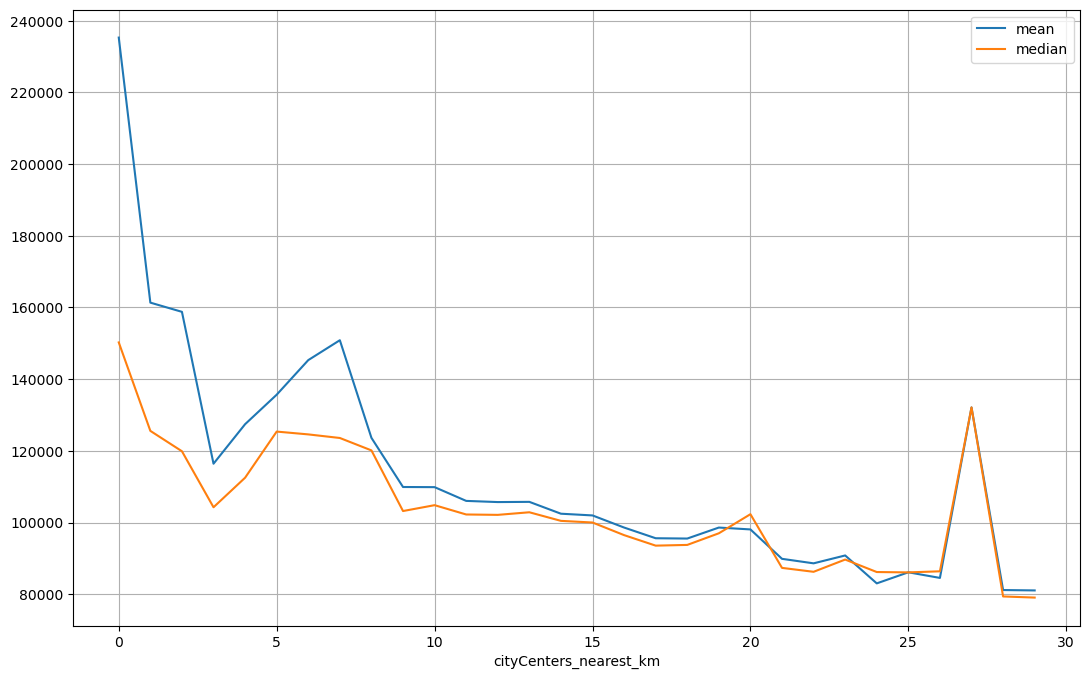

In [123]:
data[data['locality_name'] == 'Санкт-Петербург'].pivot_table(index='cityCenters_nearest_km', values='square_meter_price', aggfunc=('mean', 'median')).plot(figsize=(13, 8), grid=True);

<div class="alert alert-info">
<b>Комментарий студента(v2):</b>
<br>Новый вывод ниже
</div>

В самом центре на нулевой отметке цена за квадратный метр(медиана) стоит на отметке 150 млн.р. Дальше на первом же километре падает до 125 млн. Дальше высота в 125 млн.р. Встречается на удаленности в 5 км и 27км(132 млн.р.). Не смотря на эти скачки, тенденция к падению цены за квадратный метр поддерживается. 

Вывод: Удаленность от центра города вляет на стоимость квадратного метра.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b>
<br>Правка выполнена 👍
</div>

## Общий вывод

На стоимость квартиры влияет очень много факторов, но нельзя вывести какое то железное правило. Нельзя сказать, что изменив какой то параметр, цена обязательно полетит вверх. При этом есть небольшая взаимосвязь между ценой 

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай увеличим объем вывода, чтобы он получится более подробным. Хорошей практикой является написание в общем выводе всех твоих действий (кратко) по проекту. А после этого нужно написать общий вывод использую информацию из промежуточных выводов после каждого раздела. Твой вывод раскрывает для заказчика всю твою проделанную работу и за что он платит деньги, даже если ему не интересен весь процесс исследования, то в отчёт он заглянет обязательно. 
</div>

Первичный анализ данных показал большое количество пропущенных значений и данных неправильного формата. Требовалась предобработка данных для корректоного изучения показателей.

В предобработку вошли:
- Обработка пропущенных значений. Удаление квартир где было пропущенно больше половины значений или значений критически важных для статистики. Заполнение пропущенных значений;
- Изменение типов данных;

В таблицу были добавлены новые столбцы, требуемые для аналитики:
- Цена за один квадратный метр.
- День недели публикации объявления
- Месяц публикации объявления
- Год публикации объявления
- Тип этажа квартиры

После этого был проведен исследовательский анализ данных:
    
    Поиск аномальных значений:
    - В колонках общей, жилой и кухонной площади есть значения, которые выделяются среди остальных. Но похоже, что это реальные объекты с реальными данными.
    - С ценой все так же как и с площадью. У непривычно больших квартир, не привычно большие цены.
    - Количество комнат в больших квартирах тоже отличается. 
    - В колонке с высотой потолков были аномальные значения, которые были заменены на медиану.
    - Значение общего количества этажей в доме в нескольких строках было аномальным для Санкт- Петербурга(больше 40 этажей). Эти значения были удалены.
    - Колонки с типом этажа квартиры, расстоянием до центра города и ближайшего парка не показали аномалий.

    Изучение скорости продажи квартир:
    - 2/3 продаж всех квартир происходит в первые 200 дней;
    - Половина общего объема продаж происходит в первые 100 дней;
    - Максимальное значение длительности продажи квартир около 4 лет;
    - Самые быстрые продажи(не единичные) происходят до 7 дней. Потом большая часть объема продаж приходится на первые 20 дней, после чего продажи идут ровно, если не смотреть, на немного выбивающиеся значения на 45 и 60 днях(особенности взаимодействия сервиса с людьми).

    Поиск факторов, которые больше всего влияют на общую(полную) стоимость объекта:
    - Общая площадь положительно влияет на стоимость объекта;
    - Жилая площадь положительно влияет на стоимотсь объекта;
    - Площадь кухни не влияет на цену;
    - Количество не прямо влияет на стоимость объекта, скорее увеличение площади влияет на стоимость;
    - Квартиры на первом этаже гораздо дешевле остальных. Квартиры на "других" этажах ценятся больше;
    - День размещения объявления не влияет на итоговую стоимость объекта;
    - Месяц размещения влияет на стоимость объекта. Дороже квартиры продаются в декабре, а дешевле в июне;
    - Дороже всего квартиры продавались в 2014 году, в 2016 году были самые низкие цены, но потом ситауция начала стабилизироваться.

    Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:
    - Первое место Санкт-Петербург 111 тыс.р./кв.м.
    - Второе место Пушкин 102 тыс.р./кв.м.
    - Третье место Кудрово 94 тыс.р./кв.м.
    
    Cредняя стоимость квадратного метра на разном удалении от центра:
    - Самая большая цена за квадратный метр в самом центре города.
    - При этом на расстоянии одного километра стоимость такая же как и на расстоянии в 5 км и 27 км, но это скачки;
    - Не смотря на скачки цена за квадратный метр падает при увеличении расстояния от центра города
    





<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Супер! Так гораздо лучше)
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Необходимо поправить:
<br>- не заполнять пропуски в столбцах с картографическими данными	
<br>- корректно изучить зависимость цены от категории этажа и времени публикации объявления
<br>- корректно рассчитать стоимость каждого километра в последнем шаге
<br>- дописать общий вывод

<br>После всех внесённых правок не забудь поправить выводы там, где это необходимо
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Не получилось с барплотами. Прошу помочь и тогда закончу вывод и проект. Спасибо)
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v2:</b> 
<br>Необходимо поправить:
<br>- корректно изучить зависимость цены от категории этажа и времени публикации объявления
<br>- корректно рассчитать стоимость каждого километра в последнем шаге

<br>После всех внесённых правок не забудь поправить выводы там, где это необходимо
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v3:</b>
<br>Все правки выполнены. Молодец!
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.